In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler,normalize
from sklearn.decomposition import PCA
import data_processing as dp
from scipy import signal
from scipy.stats import skew,zscore
import seaborn as sns
import matplotlib.pyplot as plt
import pywt
import os
import time
import h5py
from itertools import combinations
from PyEMD import EMD,EEMD
import ctypes

In [2]:
# read file name of data with various Labels
df = pd.read_csv('./useful_data_label.csv',index_col=0) 
# read file name of data with only label 0
df2 = pd.read_csv('./unuseful_data_label.csv',index_col=0)
# read some of the data with only label 0
df3 = pd.read_csv('./data/file_name.txt',header=None)
player = ctypes.windll.kernel32

In [4]:
import imp
imp.reload(dp)

<module 'data_processing' from 'E:\\Document\\jupyter\\Master Thesis\\data_processing.py'>

In [4]:
ind = df2.iloc[1].isna()
files = np.concatenate([np.array(df.columns),np.array('正常/'+df2.columns[ind])])
files[[5,30,31,32,33,34,35]]

array(['G07_Freezing_Trial1_trial_1_emg.csv',
       '正常/G09_Walking_trial_2_emg.csv', '正常/G09_Walking_trial_4_emg.csv',
       '正常/G09_Walking_trial_6_emg.csv', '正常/G11_Walking_trial_2_emg.csv',
       '正常/G11_Walking_trial_4_emg.csv',
       '正常/P231_M050_A_Walking_trial_2_emg.csv'], dtype=object)

In [21]:
# read the data and labels of df2 or df3
sc = StandardScaler(with_mean = True)
#sc = MinMaxScaler()
ind = df2.iloc[1].isna()
files = np.concatenate([np.array(df.columns),np.array('正常/'+df2.columns[ind])])
#files = np.array(df.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]])#[[2,5,6,7,8,10,11,12,13,16,17,18,19,20]])
N = len(files)
#sc = StandardScaler(with_mean=False)
width = 1024
stride = 512
start = time.time()
i = 0
X = []
Y = []
X2 = []
Y2 = []
X3 = []
Y3 = []
F = []
F2 = []
F3 = []
for file in files:
    i += 1
    if file.find('G04')==0:
        continue
    emg_data = pd.read_csv('./data/'+file)
    #emg_data.iloc[:,3:] = 
    emg_data = emg_data.dropna().reset_index(drop=True)
    #emg_data.iloc[:,3:]=normalize(emg_data.iloc[:,3:],axis=0)
    #emg_data.iloc[:,3:] = sc.fit_transform(emg_data.iloc[:,3:])
    #for j in (0,1,4,5):
        #ind = abs(zscore(emg_data.iloc[:,j+3]))>10
        #emg_data=emg_data.loc[~ind,:]
        #ind_p = zscore(emg_data.iloc[:,j+3])>10
        #ind_n = zscore(emg_data.iloc[:,j+3])<-10
        #emg_data.loc[ind_p,emg_data.columns[3+j]] = emg_data.loc[~ind_p,emg_data.columns[3+j]].max()
        #emg_data.loc[ind_n,emg_data.columns[3+j]] = emg_data.loc[~ind_n,emg_data.columns[3+j]].min()
    fn = 300
    wn=2*fn/1000
    fn1 = 400
    wn1 = 2*fn1/1000
    #fs = 1000.0  # Sample frequency (Hz)
    #f0 = 50  # Frequency to be removed from signal (Hz)
    #Q = 100.0  # Quality factor
    # Design notch filter
    #b1, a1 = signal.iirnotch(f0, Q, fs)
    #b, a = signal.butter(4, [wn,wn1], 'bandpass')
    b, a = signal.butter(4, [wn], 'lowpass')
    #b, a = signal.butter(4, [wn], 'highpass')
    #for j in ['LEFT_TA','LEFT_TS','LEFT_BF','LEFT_RF','RIGHT_TA','RIGHT_TS','RIGHT_BF','RIGHT_RF']:
        #emg_data.loc[:,j] = signal.filtfilt(b, a, emg_data.loc[:,j])
        #emg_data.loc[:,j] = signal.filtfilt(b1, a1, emg_data.loc[:,j])
    """if file==df.columns[5]:
        print(file)
        fs = 1000.0  # Sample frequency (Hz)
        f0 = 72  # Frequency to be removed from signal (Hz)
        Q = 50.0  # Quality factor
        # Design notch filter
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TA'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TA'])
        f0 = 75  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
        f0 = 13.2  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'RIGHT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'RIGHT_TS'])
    if file==df.columns[6]:
        print(file)
        fs = 1000.0  # Sample frequency (Hz)
        f0 = 40  # Frequency to be removed from signal (Hz)
        Q = 100.0  # Quality factor
        # Design notch filter
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TA'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TA'])
        f0 = 26.5  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
        f0 = 13.2  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
        f0 = 48  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        #emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
        f0 = 50  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'RIGHT_TA'] = signal.filtfilt(b1, a1, emg_data.loc[:,'RIGHT_TA'])
    if file==df.columns[7]:
        print(file)
        fs = 1000.0  # Sample frequency (Hz)
        f0 = 13.2  # Frequency to be removed from signal (Hz)
        Q = 50.0  # Quality factor
        # Design notch filter
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
        emg_data.loc[:,'RIGHT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'RIGHT_TS'])
        f0 = 26.5  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
        f0 = 50  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
    """
    #emg_data.iloc[:,3:] = sc.fit_transform(emg_data.iloc[:,3:])
    #emg_data.iloc[:,3:]=normalize(emg_data.iloc[:,3:],axis=0)
    x_raw,y = dp.generate_window_slide_data_time_continue(emg_data,width=width,
                                        stride=stride,
                                        scaler=True,
                                        same_label=True)
    #x=np.abs(x)
    #x=dp.lowpass_filter(x,300)
    #x=dp.mean_smooth(x)
    shape = x_raw.shape
    #x = np.zeros(shape)
    x = x_raw
    for n in range(shape[0]):
        x[n,:,:] = dp.detrend(x_raw[n,:,:],50)
        for c in range(shape[2]):
            x[n,:,c] = signal.filtfilt(b,a,x[n,:,c])
    #x = dp.rectify_emg_moving_average(x,30)
    
    ind1 = []
    ind2 = []
    ind3 = []
    l = len(y)
    for j in set(y):
        ind = np.where(y == j)[0].tolist()
        l_t = len(ind)
#         if (j==1)&((file==df.columns[5])|(file==df.columns[17])):
#             continue
        if (file == df.columns[5]) | (file == files[30])| (file == files[31])| (file == files[32])| (file == files[33])| (file == files[34])| (file == files[35]):
            ind3 += ind
            #print(df.columns[6])
        else:
            ind1 += ind[:int(l_t*0.8)]
            ind2 += ind[int(l_t*0.8):int(l_t*1.)]
        #ind3 += ind[int(l_t*0.8):]

    l1 = len(ind1)
    l2 = len(ind2)
    l3 = len(ind3)

    fi = [file]*len(ind1)
    fi2 = [file]*len(ind2)
    fi3 = [file]*len(ind3)
    
    X += x[ind1].tolist()
    Y += y[ind1].tolist()
    
    X2 += x[ind2].tolist()
    Y2 += y[ind2].tolist()
    
    X3 += x[ind3].tolist()
    Y3 += y[ind3].tolist()
    
    F += fi
    F2 += fi2
    F3 += fi3
    print('%d/%d: '%(i,N)+file)

ind_c = [True,True,False,False,True,True,False,False]
X = np.array(X)#[:,:,ind_c]
Y = np.array(Y)
X2 = np.array(X2)#[:,:,ind_c]
Y2 = np.array(Y2)
X3 = np.array(X3)#[:,:,ind_c]
Y3 = np.array(Y3)
end = time.time()
duration = end-start
print('Duration: %f'%(duration))
player.Beep(1000,200)

3/174: G06_FoG_trial_1_emg.csv
4/174: G06_FoG_trial_2_emg.csv
5/174: G06_FoG_trial_3_emg.csv
6/174: G07_Freezing_Trial1_trial_1_emg.csv
7/174: G08_FoG_1_trial_1_emg.csv
8/174: G08_FoG_2_trial_1_emg.csv
9/174: G11_FoG_trial_1_emg.csv
10/174: G11_FoG_trial_2_emg.csv
11/174: P379_M050_2_OFF_A_FoG_trial_1_emg.csv
12/174: P379_M050_2_OFF_A_FoG_trial_2_emg.csv
13/174: P379_M050_2_OFF_A_FoG_trial_3_emg.csv
14/174: P379_M050_2_OFF_B_FoG_trial_1_emg.csv
15/174: P379_M050_2_OFF_B_FoG_trial_2_emg.csv
16/174: P379_M050_2_OFF_B_FoG_trial_3_emg.csv
17/174: P551_M050_2_A_FoG_trial_1_emg.csv
18/174: P551_M050_2_B_FoG_trial_1_emg.csv
19/174: P551_M050_2_B_FoG_trial_2_emg.csv
20/174: P812_M050_2_B_FoG_trial_1_emg.csv
21/174: P812_M050_2_B_FoG_trial_2_emg.csv
22/174: 正常/G02_Walking_trial_1_emg.csv
23/174: 正常/G03_Walking_trial_1_emg.csv
24/174: 正常/G03_Walking_trial_2_emg.csv
25/174: 正常/G05_Walking_struct_fixed_trial_1_emg.csv
26/174: 正常/G05_Walking_struct_fixed_trial_2_emg.csv
27/174: 正常/G05_Walking_struc

1

In [4]:
df.columns[6]
files[30]

'正常/G09_Walking_trial_2_emg.csv'

In [6]:
len(X)+len(X2)+len(X3)

8644

In [291]:
Xr = dp.rectify_emg_moving_average(X,20)
Xr2 = dp.rectify_emg_moving_average(X2,20)
Xr3 = dp.rectify_emg_moving_average(X3,20)

In [90]:
# read the data and labels of df2 or df3
sc = StandardScaler(with_mean = True)
#sc = MinMaxScaler()
ind = df2.iloc[1].isna()
#files = np.concatenate([np.array(df.columns),np.array('正常/'+df2.columns[ind])])
files = np.array(df.columns[[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]])#[[2,5,6,7,8,10,11,12,13,16,17,18,19,20]])
N = len(files)
#sc = StandardScaler(with_mean=False)
width = 1024
stride = 512
start = time.time()
i = 0
X = []
Y = []
X2 = []
Y2 = []
X3 = []
Y3 = []
F = []
F2 = []
F3 = []
for file in files:
    i += 1
    emg_data = pd.read_csv('./data/'+file)
    #emg_data.iloc[:,3:] = 
    emg_data = emg_data.dropna().reset_index(drop=True)
    #emg_data.iloc[:,3:]=normalize(emg_data.iloc[:,3:],axis=0)
    #emg_data.iloc[:,3:] = sc.fit_transform(emg_data.iloc[:,3:])
    #for j in (0,1,4,5):
        #ind = abs(zscore(emg_data.iloc[:,j+3]))>10
        #emg_data=emg_data.loc[~ind,:]
        #ind_p = zscore(emg_data.iloc[:,j+3])>10
        #ind_n = zscore(emg_data.iloc[:,j+3])<-10
        #emg_data.loc[ind_p,emg_data.columns[3+j]] = emg_data.loc[~ind_p,emg_data.columns[3+j]].max()
        #emg_data.loc[ind_n,emg_data.columns[3+j]] = emg_data.loc[~ind_n,emg_data.columns[3+j]].min()
    fn = 300
    wn=2*fn/1000
    fn1 = 400
    wn1 = 2*fn1/1000
    #fs = 1000.0  # Sample frequency (Hz)
    #f0 = 50  # Frequency to be removed from signal (Hz)
    #Q = 100.0  # Quality factor
    # Design notch filter
    #b1, a1 = signal.iirnotch(f0, Q, fs)
    #b, a = signal.butter(4, [wn,wn1], 'bandpass')
    b, a = signal.butter(4, [wn], 'lowpass')
    #b, a = signal.butter(4, [wn], 'highpass')
    #for j in ['LEFT_TA','LEFT_TS','LEFT_BF','LEFT_RF','RIGHT_TA','RIGHT_TS','RIGHT_BF','RIGHT_RF']:
        #emg_data.loc[:,j] = signal.filtfilt(b, a, emg_data.loc[:,j])
        #emg_data.loc[:,j] = signal.filtfilt(b1, a1, emg_data.loc[:,j])

    #emg_data.iloc[:,3:] = sc.fit_transform(emg_data.iloc[:,3:])
    #emg_data.iloc[:,3:]=normalize(emg_data.iloc[:,3:],axis=0)
    x_raw,y = dp.generate_window_slide_data_time_continue(emg_data,width=width,
                                        stride=stride,
                                        scaler=False,
                                        same_label=True)
    #x=np.abs(x)
    #x=dp.lowpass_filter(x,300)
    #x=dp.mean_smooth(x)
    shape = x_raw.shape
    #x=x_raw
    x = np.zeros(shape)
    for l in range(shape[0]):
        x[l,:,:] = dp.detrend(x_raw[l,:,:],300)
        for c in range(shape[2]):
            x[l,:,c] = signal.filtfilt(b,a,x[l,:,c])


    X += x.tolist()
    Y += y.tolist()
    fi = [file]*len(x)
    F += fi
    print('%d/%d: '%(i,N)+file)
X = np.array(X)
Y = np.array(Y)
F = np.array(F)
ind1 = []
ind2 = []
ind3 = []
for j in set(Y):
    ind = np.where(Y == j)[0].tolist()
    l_t = len(ind)
    if j==1:
        ind = np.where((Y==1)&(F!=df.columns[5])&(F!=df.columns[17]))[0].tolist()
        l_t = len(ind)
    ind1 += ind[:int(l_t*0.6)]
    ind2 += ind[int(l_t*0.6):int(l_t*0.8)]
    ind3 += ind[int(l_t*0.8):]
X1 = X[ind1]
X2 = X[ind2]
X3 = X[ind3]
Y1 = Y[ind1]
Y2 = Y[ind2]
Y3 = Y[ind3]
F1 = F[ind1]
F2 = F[ind2]
F3 = F[ind3]
end = time.time()
duration = end-start
print('Duration: %f'%(duration))

1/19: G06_FoG_trial_1_emg.csv
2/19: G06_FoG_trial_2_emg.csv
3/19: G06_FoG_trial_3_emg.csv
4/19: G07_Freezing_Trial1_trial_1_emg.csv
5/19: G08_FoG_1_trial_1_emg.csv
6/19: G08_FoG_2_trial_1_emg.csv
7/19: G11_FoG_trial_1_emg.csv
8/19: G11_FoG_trial_2_emg.csv
9/19: P379_M050_2_OFF_A_FoG_trial_1_emg.csv
10/19: P379_M050_2_OFF_A_FoG_trial_2_emg.csv
11/19: P379_M050_2_OFF_A_FoG_trial_3_emg.csv
12/19: P379_M050_2_OFF_B_FoG_trial_1_emg.csv
13/19: P379_M050_2_OFF_B_FoG_trial_2_emg.csv
14/19: P379_M050_2_OFF_B_FoG_trial_3_emg.csv
15/19: P551_M050_2_A_FoG_trial_1_emg.csv
16/19: P551_M050_2_B_FoG_trial_1_emg.csv
17/19: P551_M050_2_B_FoG_trial_2_emg.csv
18/19: P812_M050_2_B_FoG_trial_1_emg.csv
19/19: P812_M050_2_B_FoG_trial_2_emg.csv
Duration: 248.794379


In [ ]:

#files2 = np.array(df2.columns)
ind = df2.iloc[1].isna()
files3 = df2.columns[ind]
N = len(files3)
for file in files3:
    if file in np.array(df3):
        #i += 1
        print('skip')
        continue
    i += 1
    emg_data = pd.read_csv('./data/正常/'+file)
    #emg_data.iloc[:,3:] = 
    emg_data = emg_data.dropna().reset_index(drop=True)
    #emg_data.iloc[:,3:]=normalize(emg_data.iloc[:,3:],axis=0)
    #emg_data.iloc[:,3:] = sc.fit_transform(emg_data.iloc[:,3:])
    #for j in (0,1,4,5):
        #ind = abs(zscore(emg_data.iloc[:,j+3]))>10
        #emg_data=emg_data.loc[~ind,:]
        #ind_p = zscore(emg_data.iloc[:,j+3])>10
        #ind_n = zscore(emg_data.iloc[:,j+3])<-10
        #emg_data.loc[ind_p,emg_data.columns[3+j]] = emg_data.loc[~ind_p,emg_data.columns[3+j]].max()
        #emg_data.loc[ind_n,emg_data.columns[3+j]] = emg_data.loc[~ind_n,emg_data.columns[3+j]].min()
    fn = 10
    wn=2*fn/1000
    fn1 = 400
    wn1 = 2*fn1/1000
    #fs = 1000.0  # Sample frequency (Hz)
    #f0 = 50  # Frequency to be removed from signal (Hz)
    #Q = 100.0  # Quality factor
    # Design notch filter
    #b1, a1 = signal.iirnotch(f0, Q, fs)
    #b, a = signal.butter(4, [wn,wn1], 'bandpass')
    #b, a = signal.butter(4, [wn], 'lowpass')
    b, a = signal.butter(4, [wn], 'highpass')
    for j in ['LEFT_TA','LEFT_TS','LEFT_BF','LEFT_RF','RIGHT_TA','RIGHT_TS','RIGHT_BF','RIGHT_RF']:
        emg_data.loc[:,j] = signal.filtfilt(b, a, emg_data.loc[:,j])
        #emg_data.loc[:,j] = signal.filtfilt(b1, a1, emg_data.loc[:,j])

    #emg_data.iloc[:,3:] = sc.fit_transform(emg_data.iloc[:,3:])
    #emg_data.iloc[:,3:]=normalize(emg_data.iloc[:,3:],axis=0)
    x,y = dp.generate_window_slide_data(emg_data,width=width,
                                        stride=stride,
                                        scaler=False,
                                        same_label=True)
    #x=np.abs(x)
    #x=dp.lowpass_filter(x,300)
    #x=dp.mean_smooth(x)


    X2 += x.tolist()
    Y2 += y.tolist()
    F2 += fi2
    print('%d/%d: '%(i,N)+file)
#X = np.array(X)#[:,:,ind_c]
#Y = np.array(Y)
X2 = np.array(X2)#[:,:,ind_c]
Y2 = np.array(Y2)                
                

In [126]:
(Y3 == 0).sum()

25

In [23]:
for i in np.array('正常/'+df2.columns[ind]):
    ind=(np.array(F3) == i)
    num=(Y3[ind]==0).sum()
    print(i,':',num)

正常/G02_Walking_trial_1_emg.csv : 0
正常/G03_Walking_trial_1_emg.csv : 0
正常/G03_Walking_trial_2_emg.csv : 0
正常/G05_Walking_struct_fixed_trial_1_emg.csv : 0
正常/G05_Walking_struct_fixed_trial_2_emg.csv : 0
正常/G05_Walking_struct_fixed_trial_3_emg.csv : 0
正常/G09_FoG_trial_1_emg.csv : 0
正常/G09_FoG_trial_2_emg.csv : 0
正常/G09_FoG_trial_3_emg.csv : 0
正常/G09_Walking_trial_2_emg.csv : 48
正常/G09_Walking_trial_4_emg.csv : 33
正常/G09_Walking_trial_6_emg.csv : 40
正常/G11_Walking_trial_2_emg.csv : 56
正常/G11_Walking_trial_4_emg.csv : 39
正常/P231_M050_A_Walking_trial_2_emg.csv : 50
正常/P231_M050_A_Walking_trial_4_emg.csv : 0
正常/P231_M050_A_Walking_trial_6_emg.csv : 0
正常/P231_M050_B_Walking_trial_2_emg.csv : 0
正常/P231_M050_B_Walking_trial_4_emg.csv : 0
正常/P231_M050_B_Walking_trial_6_emg.csv : 0
正常/P231_M100_2_A_FoG_trial_3_emg.csv : 0
正常/P231_M100_2_A_Walking_trial_4_emg.csv : 0
正常/P231_M100_2_A_Walking_trial_6_emg.csv : 0
正常/P231_M100_ON_A_Walking_trial_2_emg.csv : 0
正常/P231_M100_ON_A_Walking_trial_4_emg.csv 

In [132]:
len(F3)

0

In [54]:
# read the data and labels of df2 or df3
sc = StandardScaler()
#sc = MinMaxScaler()
ind = df2.iloc[1].isna()
#files = np.concatenate([np.array(df.columns),np.array('正常/'+df2.columns[ind])])
#files = np.array(df.columns)
files = np.array(df.columns[[2,5,6,7,8,10,11,12,13,16,17,18,19,20]])
N = len(files)
#sc = StandardScaler(with_mean=False)
width = 1024
stride = 256
start = time.time()
i = 0
X = []
Y = []
X2 = []
Y2 = []
F = []
F2 = []
for file in files:
    i += 1
    emg_data = pd.read_csv('./data/'+file)
    #emg_data.iloc[:,3:] = 
    #emg_data = emg_data.dropna().reset_index(drop=True)
    #emg_data.iloc[:,3:]=normalize(emg_data.iloc[:,3:])
    #emg_data.iloc[:,3:] = sc.fit_transform(emg_data.iloc[:,3:])
    fn = 20
    wn=2*fn/1000
    fn1 = 350
    wn1 = 2*fn1/1000
    fs = 1000.0  # Sample frequency (Hz)
    f0 = 50  # Frequency to be removed from signal (Hz)
    Q = 100.0  # Quality factor
    # Design notch filter
    b1, a1 = signal.iirnotch(f0, Q, fs)
    b, a = signal.butter(4, [wn,wn1], 'bandpass')
    #b, a = signal.butter(4, [wn], 'highpass')
    #for j in ['LEFT_TA','LEFT_TS','LEFT_BF','LEFT_RF','RIGHT_TA','RIGHT_TS','RIGHT_BF','RIGHT_RF']:
        #emg_data.loc[:,j] = signal.filtfilt(b, a, emg_data.loc[:,j])
        #emg_data.loc[:,j] = signal.filtfilt(b1, a1, emg_data.loc[:,j])
    x,y = dp.generate_window_slide_data_NA_remove(emg_data,width=width,
                                        stride=stride,
                                        scaler=False,
                                        same_label=True)
    #x=np.abs(x)
    #x=dp.lowpass_filter(x,300)
    
    if file == 'G08_FoG_1_trial_1_emg.csv':
        X2 += x.tolist()
        Y2 += y.tolist()
        print('%d/%d: '%(i,N)+file)
        continue

    X += x.tolist()
    Y += y.tolist()

    print('%d/%d: '%(i,N)+file)
    
X = np.array(X)
Y = np.array(Y)
X2 = np.array(X2)
Y2 = np.array(Y2)
end = time.time()
duration = end-start
print('Duration: %f'%(duration))

1/14: G06_FoG_trial_1_emg.csv
2/14: G07_Freezing_Trial1_trial_1_emg.csv
3/14: G08_FoG_1_trial_1_emg.csv
4/14: G08_FoG_2_trial_1_emg.csv
5/14: G11_FoG_trial_1_emg.csv
6/14: P379_M050_2_OFF_A_FoG_trial_1_emg.csv
7/14: P379_M050_2_OFF_A_FoG_trial_2_emg.csv
8/14: P379_M050_2_OFF_A_FoG_trial_3_emg.csv
9/14: P379_M050_2_OFF_B_FoG_trial_1_emg.csv
10/14: P551_M050_2_A_FoG_trial_1_emg.csv
11/14: P551_M050_2_B_FoG_trial_1_emg.csv
12/14: P551_M050_2_B_FoG_trial_2_emg.csv
13/14: P812_M050_2_B_FoG_trial_1_emg.csv
14/14: P812_M050_2_B_FoG_trial_2_emg.csv
Duration: 16.192598


In [263]:
coes = pywt.wavedec(X,wavelet=wavelet,mode=0,level=level,axis=1)

In [ ]:
rec=pywt.idwt(coes[0],coes[3],wavelet='db10',mode=0,axis=1)

In [ ]:
plt.plot(emg_data.iloc[:,3])
#rec.shape

In [70]:
# file = './processed data/data_set_after_window_W1024_S512_D50_F300_SD_leave_file5_out.hdf5'
# with h5py.File(file,'w') as f:
#     f.create_dataset('X',data=np.array(X),
#                     chunks = True,dtype = np.float32)
#     f.create_dataset('Y',data=np.array(Y), dtype = np.int8)
#     f.create_dataset('X2',data=np.array(X2),
#                     chunks = True,dtype = np.float32)
#     f.create_dataset('Y2',data=np.array(Y2), dtype = np.int8)
#     f.create_dataset('X3',data=np.array(X3),
#                     chunks = True,dtype = np.float32)
#     f.create_dataset('Y3',data=np.array(Y3), dtype = np.int8)
# print('save finished.')

save finished.


In [66]:
file = './processed data/data_set_after_window_W1024_S512_D50_F300_SD_leave_file7_out.hdf5'
with h5py.File(file,'r') as f:
    X = f['X'][...]
    Y = f['Y'][...]
    X2 = f['X2'][...]
    Y2 = f['Y2'][...]
    X3 = f['X3'][...]
    Y3 = f['Y3'][...]

In [4]:
def get_features_from_dwt(data,wavelet='db7',level=5,mode=0):
    coes = pywt.wavedec(data,wavelet=wavelet,mode=mode,level=level,axis=1)
    n,l,c = coes[-1].shape
    feature = np.zeros((n,l,c,0))
    for i in range(len(coes)-1):
        #if i == 0:
        #    rec = pywt.idwt(coes[i],None,wavelet=wavelet,mode=mode,axis=1)
        #else:
        #    rec = pywt.idwt(None,coes[i],wavelet=wavelet,mode=mode,axis=1)
        temp = signal.resample(coes[i],l,axis=1)[:,:,:,np.newaxis]
        feature = np.concatenate([feature,temp],axis=3)
        #print(feature.shape)
    #print(coes[-1].shape)
    #rec = pywt.idwt(None,coes[-1],wavelet=wavelet,mode=mode,axis=1)
    #print(rec.shape)
    feature = np.concatenate([feature,coes[-1][:,:,:,np.newaxis]],axis=3)
    return feature

def get_idwt(data,wavelet='db7',level=5,mode=0):
    coes = pywt.wavedec(data,wavelet=wavelet,mode=mode,level=level,axis=1)
    n,l,c = data.shape
    feature = np.zeros((n,l,c,0))
    for i in range(len(coes)-1):
        if i == 0:
            rec = pywt.idwt(coes[i],None,wavelet=wavelet,mode=mode,axis=1)
        else:
            rec = pywt.idwt(None,coes[i],wavelet=wavelet,mode=mode,axis=1)
        temp = signal.resample(coes[i],l,axis=1)[:,:,:,np.newaxis]
        feature = np.concatenate([feature,temp],axis=3)
        #print(feature.shape)
    #print(coes[-1].shape)
    rec = pywt.idwt(None,coes[-1],wavelet=wavelet,mode=mode,axis=1)
    #print(rec.shape)
    feature = np.concatenate([feature,rec[:,:,:,np.newaxis]],axis=3)
    return feature

def get_features_from_idwt(data,wavelet='db7',level=5):
    #coes = pywt.wavedec(data,wavelet=wavelet,mode=0,level=level,axis=1)
    coes = get_features_from_dwt(data,wavelet,level)
    n,l,c,d = coes.shape
    feature = np.zeros((n,8,0))
    for i in range(d):
        #IEMG = pd.DataFrame(compute_IEMG(coes[i]),columns=columns+'_IEMG')
        RMS = dp.compute_RMS(coes[:,:,:,i])[:,:,np.newaxis]
        #WL = pd.DataFrame(dp.compute_WL(coes[i]),columns=columns+'_WL%d'%i)
        ZC = dp.compute_ZC(coes[:,:,:,i],1e-3)[:,:,np.newaxis]
        ku = dp.compute_ku(coes[:,:,:,i])[:,:,np.newaxis]
        #SSC = pd.DataFrame(dp.compute_SSC(coes[i],threshold_SSC),columns=columns+'_SSC%d'%i)
        #WAMP = dp.compute_WAMP(coes[:,:,:,i],threshold_WAMP)[:,:,np.newaxis]
        skew = dp.compute_Skewness(coes[:,:,:,i])[:,:,np.newaxis]
        Acti = dp.compute_Acti(coes[:,:,:,i])[:,:,np.newaxis]
        AR = dp.compute_AR(coes[:,:,:,i])[:,:,np.newaxis]
        #AR = dp.compute_AR_pd(coes[i])
        #HIST = dp.compute_HIST_pd(coes[i],bins=bins,ranges=ranges)
        #FHIST = dp.compute_FHIST_pd(coes[i],bins=fbins,ranges=franges,threshold=threshold_F)
        #MF = dp.compute_MaxFreq_pd(coes[i],num=num)
        MDF = dp.compute_MDF(coes[:,:,:,i])[:,:,np.newaxis]
        MNF = dp.compute_MNF(coes[:,:,:,i])[:,:,np.newaxis]
        feature = np.concatenate([feature,RMS,ZC,ku,skew,Acti,AR,MDF,MNF],axis =2)
    return feature

def get_emd(data,max_imf=5):
    emd = EMD()
    n,l,c=data.shape
    feature = np.zeros((n,c,l,max_imf+1))
    for i in range(n):
        for j in range(c):
            feature[i,j,:,:]=emd(data[i,:,j],max_imf=max_imf).T
    return feature

def get_eemd(data,max_imf=5):
    eemd = EEMD()
    n,l,c=data.shape
    feature = np.zeros((n,c,l,max_imf+1))
    for i in range(n):
        for j in range(c):
            feature[i,j,:,:]=eemd(data[i,:,j],max_imf=max_imf).T
    return feature

In [27]:
del feature,feature2,feature3

In [67]:
wavelet = 'db7'
level = 5
feature=get_features_from_dwt(X,wavelet,level,1).transpose((0,2,1,3))
feature2=get_features_from_dwt(X2,wavelet,level,1).transpose((0,2,1,3))
feature3=get_features_from_dwt(X3,wavelet,level,1).transpose((0,2,1,3))
# feature=get_idwt(X,wavelet,level).transpose((0,2,1,3))
# feature2=get_idwt(X2,wavelet,level).transpose((0,2,1,3))
# feature3=get_idwt(X3,wavelet,level,1).transpose((0,2,1,3))
# feature=get_emd(X,level)
# feature2=get_emd(X2,level)
# feature3=get_emd(X3,level)

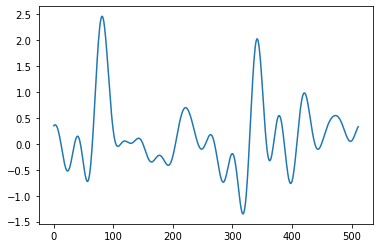

In [61]:
plt.plot(feature[500,0,:,1])
#plt.figure()
#plt.plot(feature.transpose((0,2,1,3))[10,0,:,4])

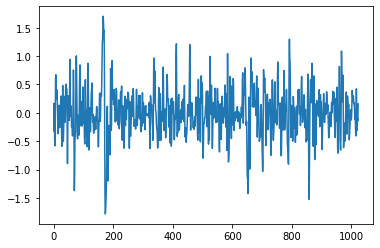

In [11]:
plt.plot(X[500,:,0])

In [ ]:
feature = get_eemd(X)
feature2=get_eemd(X2)

In [117]:
path = './processed data/eemd_data_W1024_S512_lp300.hdf5'
with h5py.File(path,'w') as f:
    f.create_dataset('feature',data=feature,
                    chunks = True,dtype = np.float32)
    f.create_dataset('Y',data=np.array(Y), dtype = np.int8)
    f.create_dataset('feature2',data=feature2,
                    chunks = True,dtype = np.float32)
    f.create_dataset('Y2',data=np.array(Y2), dtype = np.int8)
    f.create_dataset('feature3',data=feature3,
                    chunks = True,dtype = np.float32)
    f.create_dataset('Y3',data=np.array(Y3), dtype = np.int8)

In [4]:
path = './processed data/eemd_data_W1024_S512_lp300.hdf5'
with h5py.File(path,'r') as f:
    feature=f['feature'][...]
    feature2=f['feature2'][...] 
    feature3=f['feature3'][...] 
    Y = f['Y'][...]
    Y2 = f['Y2'][...]
    Y3 = f['Y3'][...]

In [36]:
eemd = EEMD()
imfs = eemd(X[0,:,0])

In [23]:
feature3.shape

(261,)

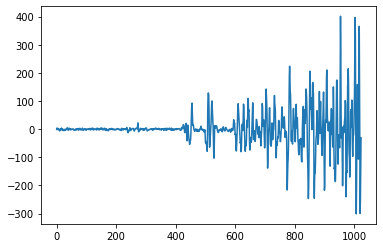

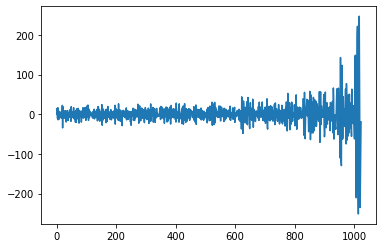

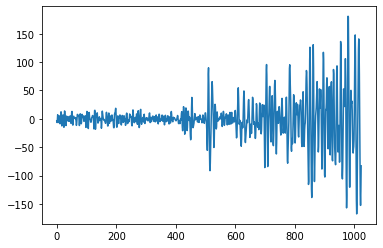

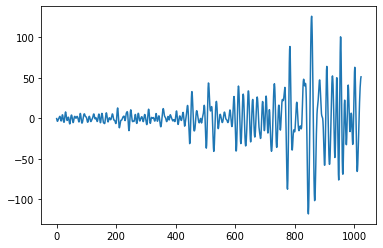

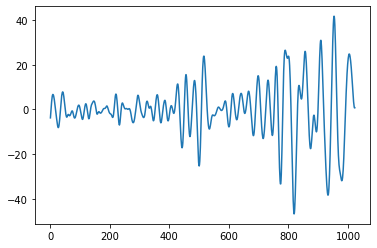

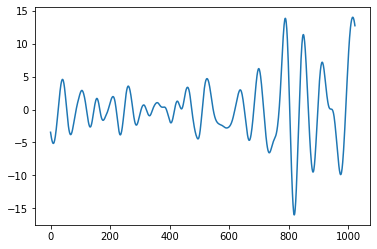

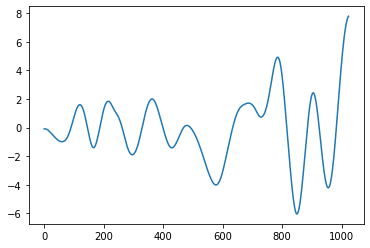

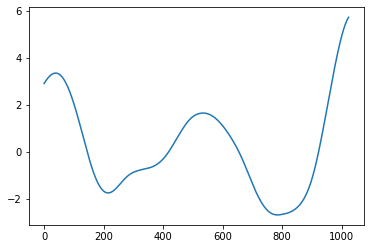

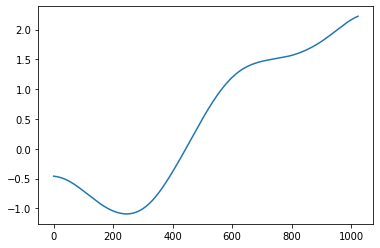

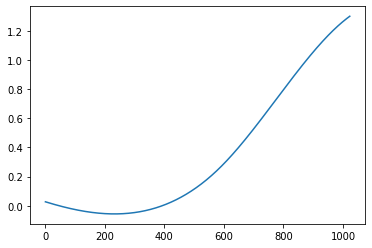

In [42]:
#plt.figure(figsize=(12,8))
plt.plot(X[0,:,0])
for i in range(9):
    plt.figure()
    plt.plot(imfs[i])
#plt.plot(feature[0,1,:,5])

In [20]:
from tensorflow import keras
from tensorflow.keras import layers,regularizers,activations
from tensorflow.keras.models import save_model,load_model
from tensorflow.keras import callbacks, Model, models
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import TruncatedNormal
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve,confusion_matrix,accuracy_score
import tensorflow as tf
from tensorflow.keras import backend as K
from imblearn.over_sampling import SMOTE

In [72]:
def train_model(model,feature,y,binary=True,file=None):
    if binary:
        ind = ((y==0)|(y==1)|(y==2)|(y==3)|(y==4)|(y==6))
        ind1 = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
        y_01 = y.copy()
        #ind1 = ((y_01==1)|(y_01==2)|(y_01==6))
        y_01[ind1] = 1
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:1,1:30}
    else:
        ind = ((y==0)|(y==2)|(y==6))
        #ind = ((y==2)|(y==6))
        y_01 = y[ind].copy()
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:4,1:1,2:1}#{0:2,1:1,2:10,3:2}
    x_full,x_test,y_full,y_test = train_test_split(np.array(feature)[ind],y_01,
                                                   test_size=0.25,
                                                   random_state=123,
                                                   shuffle=True)
    x_train,x_valid,y_train,y_valid = train_test_split(x_full,y_full,
                                                       test_size=0.25,
                                                       random_state=555,
                                                       shuffle=True)

    x_train = x_full
    y_train = y_full
    x_valid = x_test
    y_valid = y_test
    
    early_stopping = callbacks.EarlyStopping(patience = 10,
                                             monitor = 'val_loss', 
                                             #baseline = 0.9,
                                             restore_best_weights=True)
    history = model.fit(x_train,y_train,validation_data=(x_valid,y_valid),
                        epochs=300,batch_size=32,class_weight=cw,
                        callbacks=[early_stopping],
                        shuffle=True)
    
    if binary:
        y_pred_t=model.predict(x_test)
        test = accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1))
        #test = accuracy_score(np.argmax(y_test,axis=1),y_test,y_pred_t>0.5)
        
        y_pred_v=model.predict(x_valid)
        valid = accuracy_score(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1))
        y_pred_ta=model.predict(x_train)
        train = accuracy_score(np.argmax(y_train,axis=1),np.argmax(y_pred_ta,axis=1))
        #train = accuracy_score(y_full,y_pred_ta>0.5)
        
        print('train: \n',confusion_matrix(np.argmax(y_train,axis=1),np.argmax(y_pred_ta,axis=1)))
        print('valid: \n',confusion_matrix(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1)))
        print('test: \n',confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1)))
        
        #print('train: \n',metrics.confusion_matrix(y_full,y_pred_ta>0.5))
        #print('test: \n',metrics.confusion_matrix(y_test,y_pred_t>0.5))
        print('test:%f'%test)
        print('valid:%f'%valid)
        print('train:%f'%train)

    else:
        #y_pred_t=model.predict(x_test)
        #test = accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1))
        y_pred_v=model.predict(x_valid)
        valid = accuracy_score(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1))
        y_pred_ta=model.predict(x_train)
        train = accuracy_score(np.argmax(y_train,axis=1),np.argmax(y_pred_ta,axis=1))        
        print('train: \n',confusion_matrix(np.argmax(y_train,axis=1),np.argmax(y_pred_ta,axis=1)))
        print('valid: \n',confusion_matrix(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1)))
        #print('test: \n',confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1)))
        #print('test:%f'%test)
        print('valid:%f'%valid)
        print('train:%f'%train)
    if file != None:
        model.save_model(file)
    #return train,test

def train_model_no_shuffle(model,feature,y,binary=True,file=None):
    if binary:
        ind1 = ((y[0]==0)|(y[0]==1)|(y[0]==2)|(y[0]==3)|(y[0]==4)|(y[0]==6))
        ind2 = ((y[1]==0)|(y[1]==1)|(y[1]==2)|(y[1]==3)|(y[1]==4)|(y[1]==6))
        ind3 = ((y[2]==0)|(y[2]==1)|(y[2]==2)|(y[2]==3)|(y[2]==4)|(y[2]==6))
        ind01 = ((y[0]==4)|(y[0]==1)|(y[0]==2)|(y[0]==3)|(y[0]==6))
        ind11 = ((y[1]==4)|(y[1]==1)|(y[1]==2)|(y[1]==3)|(y[1]==6))
        ind21 = ((y[2]==4)|(y[2]==1)|(y[2]==2)|(y[2]==3)|(y[2]==6))
        
        y_01 = y[0][ind1].copy()
        y_02 = y[1][ind2].copy()
        y_03 = y[2][ind3].copy()

        #ind1 = ((y_01==1)|(y_01==2)|(y_01==6))
        y_01[ind01] = 1
        y_02[ind11] = 1
        y_03[ind21] = 1 
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:1,1:5}
    else:
        ind1 = ((y[0]==1)|(y[0]==2)|(y[0]==6))
        ind2 = ((y[1]==1)|(y[1]==2)|(y[1]==6))
        ind3 = ((y[2]==1)|(y[2]==2)|(y[2]==6))
        #ind = ((y==2)|(y==6))
        y_01 = y[0][ind1].copy()
        y_02 = y[1][ind2].copy()
        y_03 = y[2][ind3].copy()
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:4,1:1,2:1}#{0:2,1:1,2:10,3:2}


    x_train = feature[0][ind1]
    y_train = y_01
    x_valid = feature[1][ind2]
    y_valid = oc.transform(y_02[:,np.newaxis]).toarray()
    x_train,x_valid,y_train,y_valid = train_test_split(np.concatenate([x_train,x_valid]),np.concatenate([y_train,y_valid]),
                                                       test_size=0.25,
                                                       random_state=555,
                                                       shuffle=True)
    x_test = feature[2][ind3]
    y_test = oc.transform(y_03[:,np.newaxis]).toarray()
    
    early_stopping = callbacks.EarlyStopping(patience = 10,
                                             monitor = 'val_loss', 
                                             #baseline = 0.9,
                                             restore_best_weights=True)
    history = model.fit(x_train,y_train,validation_data=(x_valid,y_valid),
                        epochs=300,batch_size=32,class_weight=cw,
                        callbacks=[early_stopping],
                        shuffle=True)
    
    if binary:
        y_pred_t=model.predict(x_test)
        test = accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1))
        #test = accuracy_score(np.argmax(y_test,axis=1),y_test,y_pred_t>0.5)
        
        y_pred_v=model.predict(x_valid)
        valid = accuracy_score(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1))
        y_pred_ta=model.predict(x_train)
        train = accuracy_score(np.argmax(y_train,axis=1),np.argmax(y_pred_ta,axis=1))
        #train = accuracy_score(y_full,y_pred_ta>0.5)
        
        print('train: \n',confusion_matrix(np.argmax(y_train,axis=1),np.argmax(y_pred_ta,axis=1)))
        print('valid: \n',confusion_matrix(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1)))
        print('test: \n',confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1)))
        
        #print('train: \n',metrics.confusion_matrix(y_full,y_pred_ta>0.5))
        #print('test: \n',metrics.confusion_matrix(y_test,y_pred_t>0.5))
        print('test:%f'%test)
        print('valid:%f'%valid)
        print('train:%f'%train)

    else:
        y_pred_t=model.predict(x_test)
        test = accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1))
        y_pred_v=model.predict(x_valid)
        valid = accuracy_score(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1))
        y_pred_ta=model.predict(x_train)
        train = accuracy_score(np.argmax(y_train,axis=1),np.argmax(y_pred_ta,axis=1))        
        print('train: \n',confusion_matrix(np.argmax(y_train,axis=1),np.argmax(y_pred_ta,axis=1)))
        print('valid: \n',confusion_matrix(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1)))
        print('test: \n',confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1)))
        print('test:%f'%test)
        print('valid:%f'%valid)
        print('train:%f'%train)
    if file != None:
        model.save_model(file)
    #return train,test    
    
def test_model(model,feature,y,binary=True):
    if binary:
        ind = ((y==0)|(y==1)|(y==2)|(y==3)|(y==4)|(y==6))
        #ind1 = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
        y_01 = y[ind].copy()
        ind1 = ((y_01==1)|(y_01==2)|(y_01==3)|(y_01==4)|(y_01==6))
        y_01[ind1] = 1
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()

    else:
        #ind = ((y==0)|(y==2)|(y==6))#((y==1)|(y==2)|(y==6))
        ind = ((y==0)|(y==2)|(y==6))
        y_01 = y[ind].copy()
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()

    #print(y_01)
    #feature=sc.transform(feature[ind])
    #feature=pca.transform(feature)
    y_pred=model.predict(feature[ind])
    test = accuracy_score(np.argmax(y_01,axis=1),np.argmax(y_pred,axis=1))
    #test = metrics.accuracy_score(y_01,y_pred>0.5)
    
    print('acc:%f'%test)
    print(confusion_matrix(np.argmax(y_01,axis=1),np.argmax(y_pred,axis=1)))
    #print(metrics.confusion_matrix(y_01,y_pred>0.5))
    return test

def sparse_cost_sensitive_loss (y_true,y_pred):
    #cost_matrix = tf.constant([[0,1.5,1,1.2],
    #              [1,0,1,1],
    #              [5,10,0,5],
    #              [1.,1.,1,0]])
#     cost_matrix = tf.constant([[0.,1.,1.],
#                   [10.,0.,1.],
#                   [10.,4.,0.]])
    cost_matrix = tf.constant([[0,1.],
                 [10,0]])
    batch_cost_matrix = tf.nn.embedding_lookup(cost_matrix, tf.argmax(y_true,axis=1))
    eps = 1e-6
    probability = tf.clip_by_value(y_pred, eps, 1-eps)
    cost_values = tf.math.log(1-probability)*batch_cost_matrix
    loss = tf.reduce_mean(-tf.reduce_sum(cost_values, axis=1))
    return loss

In [163]:
X.shape

(6365, 1024, 8)

In [17]:
rate=0.0
kernel_size=5
kernel_size2=3
kernel_size3=3
stride=1
axis=1
reg=1e-4
acti='elu'

In [73]:
input_ = layers.Input(shape=feature[:,:,:,:].shape[1:])
#bn = layers.BatchNormalization()(input_)
#pooling = layers.AveragePooling2D((1,2))(input_)
#bn = layers.BatchNormalization()(input_)

cnn1 = layers.Conv1D(8,kernel_size,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                     #activation=acti, #use_bias=False,
                     kernel_regularizer=regularizers.l2(reg),
                      padding='same')(input_)
#cnn1 = layers.Conv1D(256,kernel_size3,strides=2,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
#                      padding='same')(cnn1)
# cnn1 = layers.BatchNormalization()(cnn1)
# cnn1 = layers.LayerNormalization(axis=axis)(cnn1)
# cnn1 = layers.Activation(acti)(cnn1)
cnn1 = layers.LeakyReLU(alpha=0.1)(cnn1)
# cnn1 = layers.AveragePooling2D((1,2))(cnn1)
#cnn1 = layers.MaxPooling1D(2)(cnn1)
cnn1 = layers.Dropout(rate)(cnn1)
#cnn1 = layers.MaxPooling2D((1,2))(cnn1)

cnn2 = layers.Conv1D(16,kernel_size,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                     #activation=acti,#use_bias=False,
                     kernel_regularizer=regularizers.l2(reg),
                      padding='same')(cnn1)
#cnn2 = layers.Conv1D(128,kernel_size3,strides=2,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
#                      padding='same')(cnn2)
# cnn2 = layers.LayerNormalization(axis=axis)(cnn2)
cnn2 = layers.BatchNormalization(momentum=0.8)(cnn2)
# cnn2 = layers.Activation(acti)(cnn2)
cnn2 = layers.LeakyReLU(alpha=0.1)(cnn2)
# cnn2 = layers.BatchNormalization(momentum=0.8)(cnn2)
cnn2 = layers.AveragePooling2D((1,2))(cnn2)
#cnn2 = layers.MaxPooling1D(2)(cnn2)
# cnn2 = layers.Dropout(rate)(cnn2)
#cnn2 = layers.MaxPooling2D((1,2))(cnn2)

cnn3 = layers.Conv1D(32,kernel_size,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                     # activation=acti,#use_bias=False,
                     kernel_regularizer=regularizers.l2(reg),
                      padding='same')(cnn2)
#cnn3 = layers.Conv1D(64,kernel_size3,strides=2,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
#                      padding='same')(cnn3)
# cnn3 = layers.LayerNormalization(axis=axis)(cnn3)
cnn3 = layers.BatchNormalization(momentum=0.8)(cnn3)
# cnn3 = layers.Activation(acti)(cnn3)
cnn3 = layers.LeakyReLU(alpha=0.1)(cnn3)
# cnn3 = layers.BatchNormalization(momentum=0.8)(cnn3)
cnn3 = layers.AveragePooling2D((1,2))(cnn3)
#cnn3 = layers.MaxPooling1D(2)(cnn3)
# cnn3 = layers.Dropout(rate)(cnn3)
# #cnn3 = layers.MaxPooling2D((1,2))(cnn3)

cnn4 = layers.Conv1D(16,kernel_size,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                      #activation=acti,#use_bias=False,
                     kernel_regularizer=regularizers.l2(reg),
                      padding='same')(cnn3)
# #cnn4 = layers.Conv1D(32,kernel_size3,strides=2,
#                       #kernel_initializer=TruncatedNormal(),
#                       #use_bias=False,#activation='elu',
# #                      padding='same')(cnn4)
# cnn4 = layers.LayerNormalization(axis=axis)(cnn4)
cnn4 = layers.BatchNormalization(momentum=0.8)(cnn4)
# cnn4 = layers.Activation(acti)(cnn4)
cnn4 = layers.LeakyReLU(alpha=0.1)(cnn4)
# cnn4 = layers.BatchNormalization(momentum=0.8)(cnn4)
cnn4 = layers.AveragePooling2D((1,2))(cnn4)
#cnn4 = layers.MaxPooling1D(2)(cnn4)
# cnn4 = layers.Dropout(rate)(cnn4)
#cnn4 = layers.MaxPooling2D((1,2))(cnn4)

cnn5 = layers.Conv1D(8,kernel_size,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                     #activation=acti,#use_bias=False,
                     kernel_regularizer=regularizers.l2(reg),
                      padding='same')(cnn4)
#cnn5 = layers.Conv1D(16,kernel_size3,strides=2,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
#                      padding='same')(cnn4)
# cnn5 = layers.LayerNormalization(axis=axis)(cnn5)
cnn5 = layers.BatchNormalization(momentum=0.8)(cnn5)
# cnn5 = layers.Activation(acti)(cnn5)
cnn5 = layers.LeakyReLU(alpha=0.1)(cnn5)
#cnn6 = layers.GlobalAveragePooling2D()(cnn5)
# cnn5 = layers.BatchNormalization(momentum=0.8)(cnn5)
#cnn5 = layers.GlobalAveragePooling1D()(cnn5)
cnn5 = layers.AveragePooling2D((1,2))(cnn5)
#cnn5 = layers.MaxPooling1D(2)(cnn5)
# cnn5 = layers.Dropout(rate)(cnn5)
#cnn5 = layers.MaxPooling2D((1,2))(cnn5)

cnn6 = layers.Conv1D(4,kernel_size,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                     #activation=acti,#use_bias=False,
                     kernel_regularizer=regularizers.l2(reg),
                      padding='same')(cnn5)
#cnn6 = layers.Conv1D(8,kernel_size3,strides=2,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
#                      padding='same')(cnn6)
# cnn6 = layers.LayerNormalization(axis=axis)(cnn6)
cnn6 = layers.BatchNormalization(momentum=0.8)(cnn6)
# cnn6 = layers.Activation(acti)(cnn6)
cnn6 = layers.LeakyReLU(alpha=0.1)(cnn6)
# cnn6 = layers.BatchNormalization(momentum=0.8)(cnn6)
cnn6 = layers.AveragePooling2D((1,2))(cnn6)
# cnn6 = layers.GlobalAveragePooling2D()(cnn6)
# cnn6 = layers.MaxPooling1D(2)(cnn6)
# cnn6 = layers.Dropout(rate)(cnn6)
# cnn6 = layers.MaxPooling2D((1,2))(cnn6)

# cnn7 = layers.Conv1D(2,kernel_size2,strides=stride,
#                       #kernel_initializer=TruncatedNormal(),
#                      #activation=acti, #use_bias=False,
# #                      kernel_regularizer=regularizers.l2(reg),
#                       padding='same')(cnn6)
# #cnn7 = layers.Conv1D(4,kernel_size3,strides=2,
#                       #kernel_initializer=TruncatedNormal(),
#                       #use_bias=False,#activation='elu',
# #                      padding='same')(cnn7)
# cnn7 = layers.BatchNormalization(momentum=0.8)(cnn7)
# cnn7 = layers.Activation(acti)(cnn7)
# #cnn7 = layers.LeakyReLU(alpha=0.2)(cnn7)
# # cnn7 = layers.BatchNormalization(momentum=0.8)(cnn7)
# #cnn7 = layers.LayerNormalization(axis=axis)(cnn7)
# cnn7 = layers.AveragePooling2D((1,2))(cnn7)
#cnn7 = layers.GlobalAveragePooling1D()(cnn7)
#cnn7 = layers.MaxPooling1D(2)(cnn7)
# cnn7 = layers.Dropout(rate)(cnn7)
#cnn6 = layers.MaxPooling2D((1,2))(cnn6)
flatten = layers.GlobalAveragePooling2D()(cnn6)
# flatten = layers.Flatten()(cnn5)
# dropout = layers.Dropout(rate)(flatten)
#layer1 = layers.Dense(256,activation = 'relu')(dropout)
#dropout1 = layers.Dropout(0.2)(layer1)
#layer2 = layers.Dense(128,activation = 'relu')(dropout1)
#dropout2 = layers.Dropout(0.2)(layer2)
output = layers.Dense(3,activation = 'softmax')(flatten)
model = Model(inputs=[input_],outputs=[output])

In [74]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#early_stopping = callbacks.EarlyStopping(patience = 10,monitor = 'val_accuracy', restore_best_weights=True)

In [75]:
model.summary()

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 8, 518, 6)]       0         
_________________________________________________________________
conv1d_66 (Conv1D)           (None, 8, 518, 8)         248       
_________________________________________________________________
leaky_re_lu_66 (LeakyReLU)   (None, 8, 518, 8)         0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 8, 518, 8)         0         
_________________________________________________________________
conv1d_67 (Conv1D)           (None, 8, 518, 16)        656       
_________________________________________________________________
batch_normalization_57 (Batc (None, 8, 518, 16)        64        
_________________________________________________________________
leaky_re_lu_67 (LeakyReLU)   (None, 8, 518, 16)      

In [76]:
start = time.time()
# train_model(model,X[:,:,:],Y,False)
train_model_no_shuffle(model,(np.abs(feature),np.abs(feature2),np.abs(feature3)),(Y,Y2,Y3),False)
#train_model_no_shuffle(model,(feature[:,:,:,:],feature2[:,:,:,:],feature3[:,:,:,:]),(Y,Y2,Y3),False)
end = time.time()
print(end-start)

Epoch 1/300
14/14 [==============================] - 5s 343ms/step - loss: 0.9390 - accuracy: 0.6242 - val_loss: 0.8268 - val_accuracy: 0.6913
Epoch 2/300
14/14 [==============================] - 4s 287ms/step - loss: 0.8396 - accuracy: 0.7562 - val_loss: 0.7542 - val_accuracy: 0.8322
Epoch 3/300
14/14 [==============================] - 4s 277ms/step - loss: 0.7882 - accuracy: 0.7897 - val_loss: 0.6806 - val_accuracy: 0.7987
Epoch 4/300
14/14 [==============================] - 4s 271ms/step - loss: 0.7570 - accuracy: 0.7830 - val_loss: 0.6635 - val_accuracy: 0.8255
Epoch 5/300
14/14 [==============================] - 4s 269ms/step - loss: 0.7274 - accuracy: 0.7897 - val_loss: 0.7180 - val_accuracy: 0.7718
Epoch 6/300
14/14 [==============================] - 4s 268ms/step - loss: 0.6972 - accuracy: 0.7919 - val_loss: 0.6640 - val_accuracy: 0.7919
Epoch 7/300
14/14 [==============================] - 4s 270ms/step - loss: 0.6715 - accuracy: 0.8121 - val_loss: 0.6361 - val_accuracy: 0.8255

250.94158387184143


In [32]:
model_metrics_no_shuffle(model,(np.abs(feature),np.abs(feature2),np.abs(feature3)),(Y,Y2,Y3),True)

train: 
 [[5365  197]
 [   0  525]]
valid: 
 [[1741   99]
 [  10  180]]
test: 
 [[283  43]
 [  4 197]]
test:0.910816
valid:0.946305
train:0.967636


In [156]:
model = keras.models.Sequential()
model.add(layers.InputLayer(input_shape=X[:,:,:].shape[1:]))
for rate in (2, 4, 8,16,32,64,128,256):
    model.add(layers.Conv1D(filters=32, kernel_size=2, padding="causal",
                                    activation="relu", dilation_rate=rate))
model.add(layers.Conv1D(filters=16, kernel_size=1))
model.add(layers.GlobalAveragePooling1D())
#model.add(layers.Conv1D(filters=16, kernel_size=5,padding='same'))
#model.add(layers.BatchNormalization(momentum=0.8))
#model.add(layers.Activation('relu'))
#model.add(layers.AveragePooling2D((1,2)))
#model.add(layers.Dropout(0.2))
#model.add(layers.Conv1D(filters=8, kernel_size=5,padding='same'))
#model.add(layers.BatchNormalization(momentum=0.8))
#model.add(layers.Activation('relu'))
#model.add(layers.AveragePooling2D((1,2)))
#model.add(layers.Dropout(0.2))
#model.add(layers.Conv1D(filters=4, kernel_size=5,padding='same'))
#model.add(layers.BatchNormalization(momentum=0.8))
##model.add(layers.Activation('relu'))
#model.add(layers.AveragePooling2D((1,2)))
#model.add(layers.Dropout(0.2))
#model.add(layers.Conv1D(filters=1, kernel_size=3,activation="relu"))
#model.add(layers.MaxPooling2D((1,2)))
#model.add(layers.Flatten())
model.add(layers.Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
#history = model.fit(X_train, Y_train, epochs=20,validation_data=(X_valid, Y_valid))

In [157]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_72 (Conv1D)           (None, 1024, 32)          544       
_________________________________________________________________
conv1d_73 (Conv1D)           (None, 1024, 32)          2080      
_________________________________________________________________
conv1d_74 (Conv1D)           (None, 1024, 32)          2080      
_________________________________________________________________
conv1d_75 (Conv1D)           (None, 1024, 32)          2080      
_________________________________________________________________
conv1d_76 (Conv1D)           (None, 1024, 32)          2080      
_________________________________________________________________
conv1d_77 (Conv1D)           (None, 1024, 32)          2080      
_________________________________________________________________
conv1d_78 (Conv1D)           (None, 1024, 32)         

In [158]:
start = time.time()
train_model_no_shuffle(model,(np.abs(Xr[:,:,:]),np.abs(Xr2[:,:,:]),np.abs(Xr3[:,:,:])),(Y,Y2,Y3),True)
#train_model(model,np.abs(X[:,:,:]),Y,True)
end = time.time()
print(end-start)
player.Beep(1000,1000)

Epoch 1/300
191/191 [==============================] - 58s 304ms/step - loss: 0.2506 - accuracy: 0.9165 - val_loss: 0.1669 - val_accuracy: 0.9374
Epoch 2/300
191/191 [==============================] - 54s 285ms/step - loss: 0.1520 - accuracy: 0.9456 - val_loss: 0.1425 - val_accuracy: 0.9443
Epoch 3/300
191/191 [==============================] - 54s 283ms/step - loss: 0.1170 - accuracy: 0.9578 - val_loss: 0.1374 - val_accuracy: 0.9424
Epoch 4/300
191/191 [==============================] - 56s 295ms/step - loss: 0.1075 - accuracy: 0.9593 - val_loss: 0.0934 - val_accuracy: 0.9635
Epoch 5/300
 47/191 [======>.......................] - ETA: 41s - loss: 0.0965 - accuracy: 0.9628

KeyboardInterrupt: 

In [39]:
model_metrics_no_shuffle(model,(np.abs(Xr[:,:,:]),np.abs(Xr2[:,:,:]),np.abs(Xr3[:,:,:])),(Y,Y2,Y3),False)

train: 
 [[  0  64   0]
 [  2 230   0]
 [  3 148   0]]
valid: 
 [[ 0 15  0]
 [ 1 94  0]
 [ 3 36  0]]
test: 
 [[  0 126   0]
 [  3  82   0]
 [  4 104   0]]
test:0.257053
valid:0.630872
train:0.514541


In [6]:
import wavenet

In [65]:
import imp
imp.reload(wavenet)

<module 'wavenet' from 'E:\\Document\\jupyter\\Master Thesis\\wavenet.py'>

In [230]:
filters=16

In [306]:
def residual_block(x, i):
    tanh_out = layers.Conv1D(filters, 
                      2, 
                      dilation_rate = 2**i, 
                      padding='causal', 
                      name='dilated_conv_%d_tanh' % (2 ** i), 
                      activation='tanh'
                      )(x)
    sigm_out = layers.Conv1D(filters, 
                      2, 
                      dilation_rate = 2**i, 
                      padding='causal', 
                      name='dilated_conv_%d_sigm' % (2 ** i), 
                      activation='sigmoid'
                      )(x)
    z = layers.Multiply(name='gated_activation_%d' % (i))([tanh_out, sigm_out])
    skip = layers.Conv1D(filters, 1, name='skip_%d'%(i))(z)
    res = layers.Add(name='residual_block_%d' % (i))([skip, x])
    return res, skip

In [311]:
x = layers.Input(shape=(1024,8), name='original_input')
#x_reshaped = Reshape((1024,4) + (1,), name='reshaped_input')(x)
x_reshaped = x
skip_connections = []
out = layers.Conv1D(filters, 2, dilation_rate=1, padding='causal', name='dilated_conv_1')(x_reshaped)
for i in range(1, 6):
    out, skip = residual_block(out,i)
    skip_connections.append(skip)
out = layers.Add(name='skip_connections')(skip_connections)
out = layers.Activation('elu')(out)
out = layers.Conv1D(32, 3, strides = 1, padding='same', name='conv_5ms', activation = 'relu')(out)
out = layers.MaxPooling1D(2, padding='same', name='downsample_to_200Hz')(out)
out = layers.Conv1D(16, 7, padding='same', activation='elu', name='conv_500ms')(out)
#out = layers.Conv1D(3, 3, padding='same', activation='relu', name='conv_500ms_target_shape')(out)
out = layers.MaxPooling1D(2, padding='same',name = 'downsample_to_2Hz')(out)
out = layers.Conv1D(8, 3, activation='elu', padding='same', name='final_conv')(out)
#out = layers.AveragePooling1D(2, name='final_pooling')(out)
#out = layers.Reshape((2,))(out)
out = layers.GlobalAveragePooling1D()(out)
# out = layers.Flatten()(out)
# out = layers.Dropout(0.2)(out)
# out = layers.Dense(512,activation='relu')(out)
# out = layers.Dropout(0.2)(out)
out = layers.Dense(2,activation='softmax')(out)
#out = layers.Activation('softmax')(out)
model = Model(x, out)  
model.summary()

Model: "functional_135"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
original_input (InputLayer)     [(None, 1024, 8)]    0                                            
__________________________________________________________________________________________________
dilated_conv_1 (Conv1D)         (None, 1024, 16)     272         original_input[0][0]             
__________________________________________________________________________________________________
dilated_conv_2_tanh (Conv1D)    (None, 1024, 16)     528         dilated_conv_1[0][0]             
__________________________________________________________________________________________________
dilated_conv_2_sigm (Conv1D)    (None, 1024, 16)     528         dilated_conv_1[0][0]             
_____________________________________________________________________________________

In [312]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [313]:
start = time.time()
# train_model_no_shuffle(model,(X[:,:,:],X2[:,:,:],X3[:,:,:]),(Y,Y2,Y3),False)
train_model_no_shuffle(model,(np.abs(Xr[:,:,:]),np.abs(Xr2[:,:,:]),np.abs(Xr3[:,:,:])),(Y,Y2,Y3),False)
#train_model(model,np.abs(X[:,:,:]),Y,True)
end = time.time()
print(end-start)
player.Beep(1000,1000)

Epoch 1/300
13/13 [==============================] - 4s 306ms/step - loss: 0.6781 - accuracy: 0.6281 - val_loss: 0.6035 - val_accuracy: 0.7000
Epoch 2/300
13/13 [==============================] - 3s 245ms/step - loss: 0.5994 - accuracy: 0.6985 - val_loss: 0.5789 - val_accuracy: 0.7000
Epoch 3/300
13/13 [==============================] - 3s 259ms/step - loss: 0.5768 - accuracy: 0.6985 - val_loss: 0.5414 - val_accuracy: 0.7000
Epoch 4/300
13/13 [==============================] - 3s 247ms/step - loss: 0.5184 - accuracy: 0.7010 - val_loss: 0.4948 - val_accuracy: 0.7000
Epoch 5/300
13/13 [==============================] - 3s 214ms/step - loss: 0.4696 - accuracy: 0.7462 - val_loss: 0.4051 - val_accuracy: 0.8455
Epoch 6/300
13/13 [==============================] - 3s 214ms/step - loss: 0.4189 - accuracy: 0.7940 - val_loss: 0.3821 - val_accuracy: 0.8636
Epoch 7/300
13/13 [==============================] - 3s 209ms/step - loss: 0.4023 - accuracy: 0.8065 - val_loss: 0.3850 - val_accuracy: 0.8636

1

In [83]:
model_metrics_no_shuffle(model,(np.abs(Xr[:,:,:]),np.abs(Xr2[:,:,:]),np.abs(Xr3[:,:,:])),(Y,Y2,Y3),True)

train: 
 [[  69 4992  538]
 [  45  246  146]
 [   0    0    0]]
valid: 
 [[  17 1667  169]
 [  20   84   55]
 [   0    0    0]]
test: 
 [[  5 258  13]
 [ 58 101 161]
 [  0   0   0]]
test:0.177852
valid:0.050199
train:0.052187


In [397]:
(Y==6).sum()

499

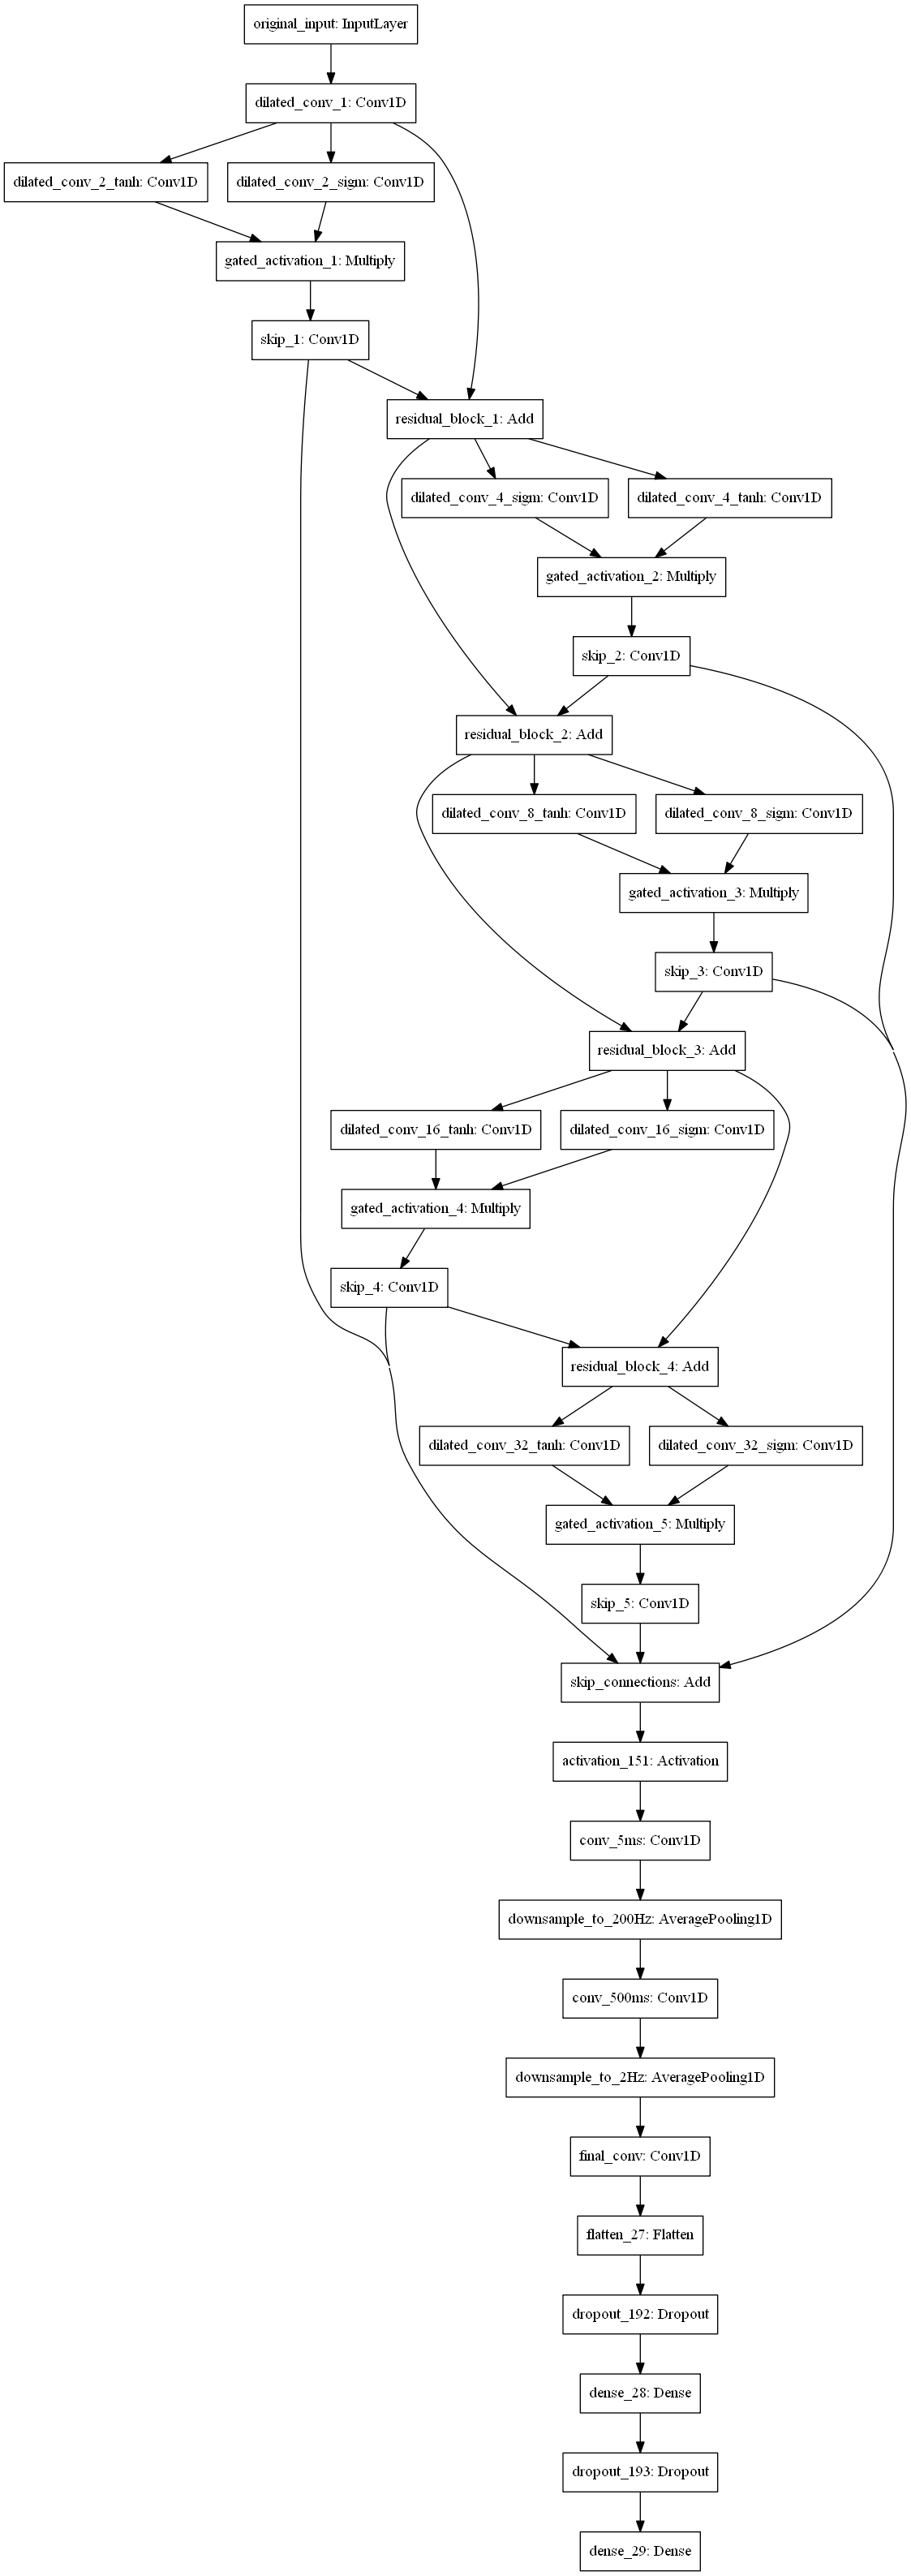

In [181]:
plot_model(model)

In [78]:
def inception_module(input_,filters,reg): 
    
    x1 = layers.Conv1D(filters=filters[0], kernel_size=3, strides=1, activation=None,padding='same',kernel_regularizer=reg)(input_)
    
    x2 = layers.Conv1D(filters=filters[1], kernel_size=7, strides=1, activation=None, padding='same',kernel_regularizer=reg)(input_)
 
    x3 = layers.Conv1D(filters=filters[2], kernel_size=11, strides=1, activation=None, padding='same',kernel_regularizer=reg)(input_)
    
    x4 = layers.Conv1D(filters=filters[3], kernel_size=15, strides=1, activation=None, padding='same',kernel_regularizer=reg)(input_)
    
    merge = layers.concatenate([x1,x2,x3,x4],axis=2)

    return merge

In [120]:
kernel_size1=11
kernel_size2=7
reg=regularizers.l2(1e-4)
input_ = layers.Input(shape=X[:,:,:4].shape[1:],name='input')
lstm = layers.Bidirectional(layers.LSTM(32,return_sequences=True,
                                           #kernel_regularizer=regularizers.l2(reg),
                                            name = 'lstm',
                                           recurrent_regularizer=reg))(input_)
cnn11 = layers.Conv1D(filters=32, kernel_size=kernel_size1,strides=1,padding='same',kernel_regularizer=reg)(lstm)
#cnn1 = inception_module(lstm,[32,16,8,8],reg)
cnn11 = layers.BatchNormalization(momentum=0.8,name='BN_11')(cnn11)
cnn11 = layers.ELU(name='Act_11')(cnn11)
cnn11 = layers.AveragePooling1D(2,name='pooling_11')(cnn11)
cnn11 = layers.Dropout(0.5,name='dropout_11')(cnn11)

cnn12 = layers.Conv1D(filters=32, kernel_size=kernel_size2,strides=1,padding='same',kernel_regularizer=reg)(lstm)
#cnn1 = inception_module(lstm,[32,16,8,8],reg)
cnn12 = layers.BatchNormalization(momentum=0.8,name='BN_12')(cnn12)
cnn12 = layers.ELU(name='Act_12')(cnn12)
cnn12 = layers.AveragePooling1D(2,name='pooling_12')(cnn12)
cnn12 = layers.Dropout(0.5,name='dropout_12')(cnn12)

cnn21 = layers.Conv1D(filters=16, kernel_size=kernel_size1,strides=1,padding='same',kernel_regularizer=reg)(cnn11)
#cnn2 = inception_module(cnn1,[16,8,4,4],reg)
cnn21 = layers.BatchNormalization(momentum=0.8,name='BN_21')(cnn21)
cnn21 = layers.ELU(name='Act_21')(cnn21)
cnn21 = layers.AveragePooling1D(2,name='pooling_21')(cnn21)
cnn21 = layers.Dropout(0.5,name='dropout_21')(cnn21)

cnn22 = layers.Conv1D(filters=16, kernel_size=kernel_size2,strides=1,padding='same',kernel_regularizer=reg)(cnn12)
#cnn2 = inception_module(cnn1,[16,8,4,4],reg)
cnn22 = layers.BatchNormalization(momentum=0.8,name='BN_22')(cnn22)
cnn22 = layers.ELU(name='Act_22')(cnn22)
cnn22 = layers.AveragePooling1D(2,name='pooling_22')(cnn22)
cnn22 = layers.Dropout(0.5,name='dropout_22')(cnn22)

cnn31 = layers.Conv1D(filters=8, kernel_size=kernel_size1,strides=1,padding='same',kernel_regularizer=reg)(cnn21)
#cnn3 = inception_module(cnn2,[8,4,2,2],reg)
cnn31 = layers.BatchNormalization(momentum=0.8,name='BN_31')(cnn31)
cnn31 = layers.ELU(name='Act_31')(cnn31)
cnn31 = layers.AveragePooling1D(2,name='pooling_31')(cnn31)
cnn31 = layers.Dropout(0.5,name='dropout_31')(cnn31)

cnn32 = layers.Conv1D(filters=8, kernel_size=kernel_size2,strides=1,padding='same',kernel_regularizer=reg)(cnn22)
#cnn3 = inception_module(cnn2,[8,4,2,2],reg)
cnn32 = layers.BatchNormalization(momentum=0.8,name='BN_32')(cnn32)
cnn32 = layers.ELU(name='Act_32')(cnn32)
cnn32 = layers.AveragePooling1D(2,name='pooling_32')(cnn32)
cnn32 = layers.Dropout(0.5,name='dropout_32')(cnn32)

cnn41 = layers.Conv1D(filters=4, kernel_size=kernel_size1,strides=1,padding='same',kernel_regularizer=reg)(cnn31)
#cnn4 = inception_module(cnn3,[4,2,1,1],reg)
cnn41 = layers.BatchNormalization(momentum=0.8,name='BN_41')(cnn41)
cnn41 = layers.ELU(name='Act_41')(cnn41)

cnn42 = layers.Conv1D(filters=4, kernel_size=kernel_size1,strides=1,padding='same',kernel_regularizer=reg)(cnn32)
#cnn4 = inception_module(cnn3,[4,2,1,1],reg)
cnn42 = layers.BatchNormalization(momentum=0.8,name='BN_42')(cnn42)
cnn42 = layers.ELU(name='Act_42')(cnn42)

cnn4 = layers.concatenate([cnn41,cnn42],axis=2)

cnn4 = layers.GlobalAveragePooling1D(name='global_average')(cnn4)
cnn4 = layers.Dropout(0.5,name='dropout_4')(cnn4)

output = layers.Dense(2,activation='softmax',kernel_regularizer=reg,name='output')(cnn4)
model = Model(input_, output) 

In [65]:
kernel_size=3
reg=regularizers.l2(1e-4)
drop_rate = 0.
kernel_initializer = 'glorot_normal'
mo = 0.8
st = 1
axis = 2
model = keras.models.Sequential()
model.add(layers.InputLayer(input_shape=X[:,:,:].shape[1:]))
#model.add(layers.BatchNormalization(momentum=mo))
#model.add(layers.LayerNormalization(axis=axis))
model.add(layers.Bidirectional(layers.LSTM(32,return_sequences=True,
                                           #kernel_regularizer=reg,
                                           recurrent_regularizer=reg)))
#model.add(layers.Bidirectional(layers.LSTM(32,return_sequences=True)))
#model.add(layers.LSTM(32,return_sequences=True))
# model.add(layers.BatchNormalization(momentum=mo))
model.add(layers.Conv1D(filters=32, kernel_size=kernel_size,strides=st,
                        padding='same',
                        kernel_regularizer=reg,
#                         kernel_initializer=kernel_initializer
                       ))
model.add(layers.BatchNormalization(momentum=mo))
#model.add(layers.LayerNormalization(axis=axis))
#model.add(layers.ELU())
model.add(layers.LeakyReLU(0.1))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(drop_rate))
model.add(layers.Conv1D(filters=16, kernel_size=kernel_size,strides=st,
                        padding='same',
                        kernel_regularizer=reg,
#                         kernel_initializer=kernel_initializer
                       ))
model.add(layers.BatchNormalization(momentum=mo))
#model.add(layers.LayerNormalization(axis=axis))
#model.add(layers.ELU())
model.add(layers.LeakyReLU(0.1))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(drop_rate))
model.add(layers.Conv1D(filters=8, kernel_size=kernel_size,strides=st,
                        padding='same',
                        kernel_regularizer=reg,
#                         kernel_initializer=kernel_initializer
                       ))
model.add(layers.BatchNormalization(momentum=mo))
#model.add(layers.LayerNormalization(axis=axis))
#model.add(layers.ELU())
model.add(layers.LeakyReLU(0.1))
model.add(layers.MaxPooling1D(2))
model.add(layers.Dropout(drop_rate))
model.add(layers.Conv1D(filters=4, kernel_size=kernel_size,strides=st,
                        padding='same',
                        kernel_regularizer=reg,
#                         kernel_initializer=kernel_initializer
                       ))
model.add(layers.BatchNormalization(momentum=mo))
#model.add(layers.LayerNormalization(axis=axis))
#model.add(layers.ELU())
model.add(layers.LeakyReLU(0.1))
model.add(layers.MaxPooling1D(2))
#model.add(layers.Dropout(drop_rate))
#model.add(layers.Conv1D(filters=4, kernel_size=kernel_size,strides=1,
#                        padding='same',
    #                   kernel_regularizer=reg,
#                        kernel_initializer=kernel_initializer))
#model.add(layers.BatchNormalization(momentum=0.8))
#model.add(layers.ELU())
#model.add(layers.Dropout(drop_rate))
#model.add(layers.Flatten())
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dropout(drop_rate))
model.add(layers.Dense(2,activation='softmax',kernel_regularizer=reg))

In [66]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_14 (Bidirectio (None, 1024, 64)          10496     
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 1024, 32)          6176      
_________________________________________________________________
batch_normalization_56 (Batc (None, 1024, 32)          128       
_________________________________________________________________
leaky_re_lu_56 (LeakyReLU)   (None, 1024, 32)          0         
_________________________________________________________________
max_pooling1d_56 (MaxPooling (None, 512, 32)           0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 512, 32)           0         
_________________________________________________________________
conv1d_57 (Conv1D)           (None, 512, 16)         

In [67]:
start = time.time()
train_model_no_shuffle(model,(np.abs(Xr[:,:,:]),np.abs(Xr2[:,:,:]),np.abs(Xr3[:,:,:])),(Y,Y2,Y3),False)
#train_model_no_shuffle(model,(X[:,:,:],X2[:,:,:],X3[:,:,:]),(Y,Y2,Y3),True)
#train_model(model,np.abs(X[:,:,:]),Y,True)
end = time.time()
print(end-start)
player.Beep(1000,1000)

Epoch 1/300
10/10 [==============================] - 6s 633ms/step - loss: 1.1070 - accuracy: 0.1930 - val_loss: 1.0653 - val_accuracy: 0.2000
Epoch 2/300
10/10 [==============================] - 5s 506ms/step - loss: 0.9888 - accuracy: 0.1930 - val_loss: 0.9372 - val_accuracy: 0.2000
Epoch 3/300
10/10 [==============================] - 5s 503ms/step - loss: 0.9172 - accuracy: 0.1930 - val_loss: 0.9226 - val_accuracy: 0.2000
Epoch 4/300
10/10 [==============================] - 5s 526ms/step - loss: 0.8562 - accuracy: 0.1930 - val_loss: 0.8907 - val_accuracy: 0.2000
Epoch 5/300
10/10 [==============================] - 5s 517ms/step - loss: 0.8166 - accuracy: 0.2373 - val_loss: 0.8152 - val_accuracy: 0.2444
Epoch 6/300
10/10 [==============================] - 6s 570ms/step - loss: 0.7639 - accuracy: 0.3861 - val_loss: 0.7221 - val_accuracy: 0.4556
Epoch 7/300
10/10 [==============================] - 6s 620ms/step - loss: 0.7277 - accuracy: 0.4652 - val_loss: 0.7201 - val_accuracy: 0.4667

Epoch 58/300
10/10 [==============================] - 5s 454ms/step - loss: 0.3429 - accuracy: 0.9842 - val_loss: 0.4428 - val_accuracy: 0.8667
Epoch 59/300
10/10 [==============================] - 5s 513ms/step - loss: 0.3350 - accuracy: 0.9873 - val_loss: 0.4512 - val_accuracy: 0.8667
Epoch 60/300
10/10 [==============================] - 5s 462ms/step - loss: 0.3221 - accuracy: 0.9873 - val_loss: 0.4524 - val_accuracy: 0.8556
Epoch 61/300
10/10 [==============================] - 5s 455ms/step - loss: 0.3205 - accuracy: 0.9873 - val_loss: 0.4393 - val_accuracy: 0.8778
Epoch 62/300
10/10 [==============================] - 6s 577ms/step - loss: 0.3175 - accuracy: 0.9842 - val_loss: 0.4419 - val_accuracy: 0.8556
Epoch 63/300
10/10 [==============================] - 5s 503ms/step - loss: 0.3125 - accuracy: 0.9905 - val_loss: 0.4397 - val_accuracy: 0.8778
Epoch 64/300
10/10 [==============================] - 4s 427ms/step - loss: 0.3076 - accuracy: 0.9905 - val_loss: 0.4385 - val_accuracy:

Epoch 115/300
10/10 [==============================] - 5s 464ms/step - loss: 0.1367 - accuracy: 1.0000 - val_loss: 0.3840 - val_accuracy: 0.8556
train: 
 [[ 61   0]
 [  0 255]]
valid: 
 [[11  7]
 [ 2 70]]
test: 
 [[91 35]
 [35 50]]
test:0.668246
valid:0.900000
train:1.000000
663.4910106658936


1

In [116]:
player.Beep(1000,1000)

1

In [87]:
ind1 = np.array(F) == df.columns[6]
ind2 = Y == 0
ind = ind1 & ind2

In [44]:
ind = ((Y3==1)|(Y3==2)|(Y3==3)|(Y3==4)|(Y3==6))
y_pre = model.predict(Xr3[ind])

y_01 = Y3[ind].copy()
y_01 = 1

#ind2=y_01==y_pre[:,1]
ind2=~((y_pre>0.5)[:,1])

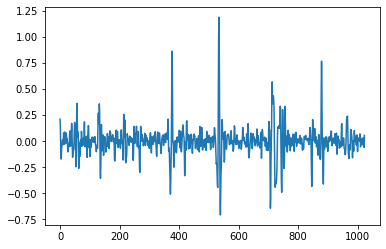

In [31]:
plt.plot(X3[ind][ind2][0,:,1])

In [47]:
Y3[ind][ind2]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 6, 6, 6, 6, 6, 6, 6])

In [31]:
test_model(model,np.abs(X3[:,:,:]),Y3,True)

acc:0.841328
[[ 26  34]
 [  9 202]]


0.8413284132841329

In [109]:
model_metrics_no_shuffle(model,(np.abs(X[:,:,:]),np.abs(X2[:,:,:]),np.abs(X3[:,:,:])),(Y,Y2,Y3),False)

train: 
 [[112   0   0]
 [  1 292   0]
 [  1   0 183]]
valid: 
 [[21  6 10]
 [ 5 94  4]
 [ 2  3 57]]
test: 
 [[ 11   3  25]
 [  5 101   2]
 [  6  18  40]]
test:0.720379
valid:0.851485
train:0.996604


In [31]:
def model_metrics(model,feature,y,binary=True,file=None):
    if binary:
        ind = ((y==0)|(y==1)|(y==2)|(y==3)|(y==4)|(y==6))
        ind1 = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
        y_01 = y.copy()
        #ind1 = ((y_01==1)|(y_01==2)|(y_01==6))
        y_01[ind1] = 1
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:1,1:5}
    else:
        ind = ((y==1)|(y==2)|(y==6))
        #ind = ((y==2)|(y==6))
        y_01 = y[ind].copy()
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:5,1:1,2:1}#{0:2,1:1,2:10,3:2}
    x_full,x_test,y_full,y_test = train_test_split(np.array(feature)[ind],y_01,
                                                   test_size=0.25,
                                                   random_state=123,
                                                   shuffle=True)
    x_train,x_valid,y_train,y_valid = train_test_split(x_full,y_full,
                                                       test_size=0.25,
                                                       random_state=555,
                                                       shuffle=True)
    
    x_train = x_full
    y_train = y_full
    x_valid = x_test
    y_valid = y_test

    
    if binary:
        y_pred_t=model.predict(x_test)
        test = accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1))
        #test = accuracy_score(y_test,y_pred_t>0.5)
        
        y_pred_v=model.predict(x_valid)
        valid = accuracy_score(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1))
        y_pred_ta=model.predict(x_train)
        train = accuracy_score(np.argmax(y_train,axis=1),np.argmax(y_pred_ta,axis=1))
        #train = accuracy_score(y_full,y_pred_ta>0.5)
        
        print('train: \n',confusion_matrix(np.argmax(y_train,axis=1),np.argmax(y_pred_ta,axis=1)))
        print('valid: \n',confusion_matrix(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1)))
        print('test: \n',confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1)))
        
        #print('train: \n',metrics.confusion_matrix(y_full,y_pred_ta>0.5))
        #print('test: \n',metrics.confusion_matrix(y_test,y_pred_t>0.5))

    else:
        #y_pred_t=model.predict(x_test)
        #test = accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1))
        y_pred_v=model.predict(x_valid)
        valid = accuracy_score(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1))
        y_pred_ta=model.predict(x_train)
        train = accuracy_score(np.argmax(y_train,axis=1),np.argmax(y_pred_ta,axis=1))        
        print('train: \n',confusion_matrix(np.argmax(y_train,axis=1),np.argmax(y_pred_ta,axis=1)))
        print('valid: \n',confusion_matrix(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1)))
        #print('test: \n',confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1)))
    #print('test:%f'%test)
    print('valid:%f'%valid)
    print('train:%f'%train)
    if file != None:
        model.save_model(file)
    #return train,test
    
    
def model_metrics_no_shuffle(model,feature,y,binary=True,file=None):
    if binary:
        ind1 = ((y[0]==0)|(y[0]==1)|(y[0]==2)|(y[0]==3)|(y[0]==4)|(y[0]==6))
        ind2 = ((y[1]==0)|(y[1]==1)|(y[1]==2)|(y[1]==3)|(y[1]==4)|(y[1]==6))
        ind3 = ((y[2]==0)|(y[2]==1)|(y[2]==2)|(y[2]==3)|(y[2]==4)|(y[2]==6))
        ind01 = ((y[0]==4)|(y[0]==1)|(y[0]==2)|(y[0]==3)|(y[0]==6))
        ind11 = ((y[1]==4)|(y[1]==1)|(y[1]==2)|(y[1]==3)|(y[1]==6))
        ind21 = ((y[2]==4)|(y[2]==1)|(y[2]==2)|(y[2]==3)|(y[2]==6))
        
        y_01 = y[0][ind1].copy()
        y_02 = y[1][ind2].copy()
        y_03 = y[2][ind3].copy()

        #ind1 = ((y_01==1)|(y_01==2)|(y_01==6))
        y_01[ind01] = 1
        y_02[ind11] = 1
        y_03[ind21] = 1 
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:1,1:5}
    else:
        ind1 = ((y[0]==2)|(y[0]==6))
        ind2 = ((y[1]==2)|(y[1]==6))
        ind3 = ((y[2]==2)|(y[2]==6))
        #ind = ((y==2)|(y==6))
        y_01 = y[0][ind1].copy()
        y_02 = y[1][ind2].copy()
        y_03 = y[2][ind3].copy()
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:4,1:1,2:1}#{0:2,1:1,2:10,3:2}


    x_train = feature[0][ind1]
    y_train = y_01
    x_valid = feature[1][ind2]
    y_valid = oc.transform(y_02[:,np.newaxis]).toarray()
    x_train,x_valid,y_train,y_valid = train_test_split(np.concatenate([x_train,x_valid]),np.concatenate([y_train,y_valid]),
                                                       test_size=0.25,
                                                       random_state=555,
                                                       shuffle=True)
    x_test = feature[2][ind3]
    y_test = oc.transform(y_03[:,np.newaxis]).toarray()

    
    if binary:
        y_pred_t=model.predict(x_test)
        test = accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1))
        #test = accuracy_score(y_test,y_pred_t>0.5)
        
        y_pred_v=model.predict(x_valid)
        valid = accuracy_score(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1))
        y_pred_ta=model.predict(x_train)
        train = accuracy_score(np.argmax(y_train,axis=1),np.argmax(y_pred_ta,axis=1))
        #train = accuracy_score(y_full,y_pred_ta>0.5)
        
        print('train: \n',confusion_matrix(np.argmax(y_train,axis=1),np.argmax(y_pred_ta,axis=1)))
        print('valid: \n',confusion_matrix(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1)))
        print('test: \n',confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1)))
        
        #print('train: \n',metrics.confusion_matrix(y_full,y_pred_ta>0.5))
        #print('test: \n',metrics.confusion_matrix(y_test,y_pred_t>0.5))

    else:
        y_pred_t=model.predict(x_test)
        test = accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1))
        y_pred_v=model.predict(x_valid)
        valid = accuracy_score(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1))
        y_pred_ta=model.predict(x_train)
        train = accuracy_score(np.argmax(y_train,axis=1),np.argmax(y_pred_ta,axis=1))        
        print('train: \n',confusion_matrix(np.argmax(y_train,axis=1),np.argmax(y_pred_ta,axis=1)))
        print('valid: \n',confusion_matrix(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1)))
        print('test: \n',confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1)))
    print('test:%f'%test)
    print('valid:%f'%valid)
    print('train:%f'%train)
    if file != None:
        model.save_model(file)
    #return train,test    
    


In [97]:
kernel_size1=9
kernel_size2=7
reg=regularizers.l2(1e-3)
input_ = layers.Input(shape=X[:,:,:].shape[1:],name='input')
lstm = layers.Bidirectional(layers.LSTM(32,return_sequences=True,
                                           #kernel_regularizer=regularizers.l2(reg),
                                            name = 'lstm',
                                           recurrent_regularizer=reg))(input_)
#cnn1 = layers.Conv1D(filters=32, kernel_size=kernel_size1,strides=1,padding='same',kernel_regularizer=reg)(lstm)
cnn1 = inception_module(lstm,[32,16,8,8],reg)
cnn1 = layers.BatchNormalization(momentum=0.8,name='BN_1')(cnn1)
cnn1 = layers.ELU(name='Act_1')(cnn1)
cnn1 = layers.AveragePooling1D(2,name='pooling_1')(cnn1)
cnn1 = layers.Dropout(0.5,name='dropout_1')(cnn1)


#cnn2 = layers.Conv1D(filters=16, kernel_size=kernel_size1,strides=1,padding='same',kernel_regularizer=reg)(cnn1)
cnn2 = inception_module(cnn1,[16,8,4,4],reg)
cnn2 = layers.BatchNormalization(momentum=0.8,name='BN_2')(cnn2)
cnn2 = layers.ELU(name='Act_2')(cnn2)
cnn2 = layers.AveragePooling1D(2,name='pooling_2')(cnn2)
cnn2 = layers.Dropout(0.5,name='dropout_2')(cnn2)

#cnn3 = layers.Conv1D(filters=8, kernel_size=kernel_size1,strides=1,padding='same',kernel_regularizer=reg)(cnn2)
cnn3 = inception_module(cnn2,[8,4,2,2],reg)
cnn3 = layers.BatchNormalization(momentum=0.8,name='BN_3')(cnn3)
cnn3 = layers.ELU(name='Act_3')(cnn3)
cnn3 = layers.AveragePooling1D(2,name='pooling_3')(cnn3)
cnn3 = layers.Dropout(0.5,name='dropout_3')(cnn3)

#cnn4 = layers.Conv1D(filters=4, kernel_size=kernel_size1,strides=1,padding='same',kernel_regularizer=reg)(cnn3)
cnn4 = inception_module(cnn3,[4,2,1,1],reg)
cnn4 = layers.BatchNormalization(momentum=0.8,name='BN_4')(cnn4)
cnn4 = layers.ELU(name='Act_4')(cnn4)
cnn4 = layers.GlobalAveragePooling1D(name='global_average')(cnn4)
cnn4 = layers.Dropout(0.5,name='dropout_4')(cnn4)

output = layers.Dense(2,activation='softmax',kernel_regularizer=reg,name='output')(cnn4)
model = Model(input_, output) 

In [83]:
kernel_size=9
reg=regularizers.l2(1e-3)
model = keras.models.Sequential()
model.add(layers.InputLayer(input_shape=X[:,:,:].shape[1:]))
model.add(layers.Bidirectional(layers.LSTM(32,return_sequences=True,
                                           #kernel_regularizer=regularizers.l2(reg),
                                           recurrent_regularizer=reg)))
#model.add(layers.Bidirectional(layers.LSTM(52,return_sequences=True)))
#model.add(layers.LSTM(32,return_sequences=True))
model.add(layers.Conv1D(filters=32, kernel_size=kernel_size,strides=1,padding='same',kernel_regularizer=reg))
model.add(layers.BatchNormalization(momentum=0.8))
model.add(layers.ELU())
model.add(layers.AveragePooling1D(2))
#model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.LSTM(16,return_sequences=True,
                                           #kernel_regularizer=regularizers.l2(reg),
                                           recurrent_regularizer=reg)))
model.add(layers.Conv1D(filters=16, kernel_size=kernel_size,strides=1,padding='same',kernel_regularizer=reg))
model.add(layers.BatchNormalization(momentum=0.8))
model.add(layers.ELU())
model.add(layers.AveragePooling1D(2))
#model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.LSTM(8,return_sequences=True,
                                           #kernel_regularizer=regularizers.l2(reg),
                                           recurrent_regularizer=reg)))
model.add(layers.Conv1D(filters=8, kernel_size=kernel_size,strides=1,padding='same',kernel_regularizer=reg))
model.add(layers.BatchNormalization(momentum=0.8))
model.add(layers.ELU())
model.add(layers.AveragePooling1D(2))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(filters=4, kernel_size=kernel_size,strides=1,padding='same',kernel_regularizer=reg))
model.add(layers.BatchNormalization(momentum=0.8))
model.add(layers.ELU())
#model.add(layers.AveragePooling1D(2))
#model.add(layers.Dropout(0.5))
#model.add(layers.Flatten())
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3,activation='softmax',kernel_regularizer=reg))

In [98]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [99]:
start = time.time()
# train_model_no_shuffle(model,(np.abs(X[:,:,:]),np.abs(X2[:,:,:]),np.abs(X3[:,:,:])),(Y,Y2,Y3),False)
train_model_no_shuffle(model,(X[:,:,:],X2[:,:,:],X3[:,:,:]),(Y,Y2,Y3),False)
#train_model(model,np.abs(X[:,:,:]),Y,True)
end = time.time()
print(end-start)
player.Beep(1000,1000)

Epoch 1/300
14/14 [==============================] - 14s 978ms/step - loss: 0.8124 - accuracy: 0.7119 - val_loss: 1.2688 - val_accuracy: 0.4043
Epoch 2/300
14/14 [==============================] - 13s 950ms/step - loss: 0.6366 - accuracy: 0.8405 - val_loss: 0.5705 - val_accuracy: 0.8865
Epoch 3/300
14/14 [==============================] - 13s 906ms/step - loss: 0.5859 - accuracy: 0.8857 - val_loss: 0.5240 - val_accuracy: 0.8652
Epoch 4/300
14/14 [==============================] - 14s 980ms/step - loss: 0.5440 - accuracy: 0.9190 - val_loss: 0.4535 - val_accuracy: 0.9362
Epoch 5/300
14/14 [==============================] - 13s 953ms/step - loss: 0.5178 - accuracy: 0.9167 - val_loss: 0.4054 - val_accuracy: 0.9433
Epoch 6/300
14/14 [==============================] - 14s 1s/step - loss: 0.5013 - accuracy: 0.9214 - val_loss: 0.3969 - val_accuracy: 0.9433
Epoch 7/300
14/14 [==============================] - 13s 915ms/step - loss: 0.4557 - accuracy: 0.9238 - val_loss: 0.3928 - val_accuracy: 0.

Epoch 58/300
14/14 [==============================] - 12s 824ms/step - loss: 0.1783 - accuracy: 0.9690 - val_loss: 0.1961 - val_accuracy: 0.9574
Epoch 59/300
14/14 [==============================] - 15s 1s/step - loss: 0.1739 - accuracy: 0.9667 - val_loss: 0.1914 - val_accuracy: 0.9645
Epoch 60/300
14/14 [==============================] - 13s 939ms/step - loss: 0.1617 - accuracy: 0.9762 - val_loss: 0.1905 - val_accuracy: 0.9574
Epoch 61/300
14/14 [==============================] - 12s 823ms/step - loss: 0.1503 - accuracy: 0.9833 - val_loss: 0.1885 - val_accuracy: 0.9574
Epoch 62/300
14/14 [==============================] - 12s 832ms/step - loss: 0.1327 - accuracy: 0.9857 - val_loss: 0.1940 - val_accuracy: 0.9574
Epoch 63/300
14/14 [==============================] - 12s 833ms/step - loss: 0.1314 - accuracy: 0.9905 - val_loss: 0.2290 - val_accuracy: 0.9504
Epoch 64/300
14/14 [==============================] - 12s 835ms/step - loss: 0.1400 - accuracy: 0.9810 - val_loss: 0.2442 - val_accur

1

In [ ]:
start = time.time()
train_model(model,X[:,:,:],Y,False)
end = time.time()
print(end-start)

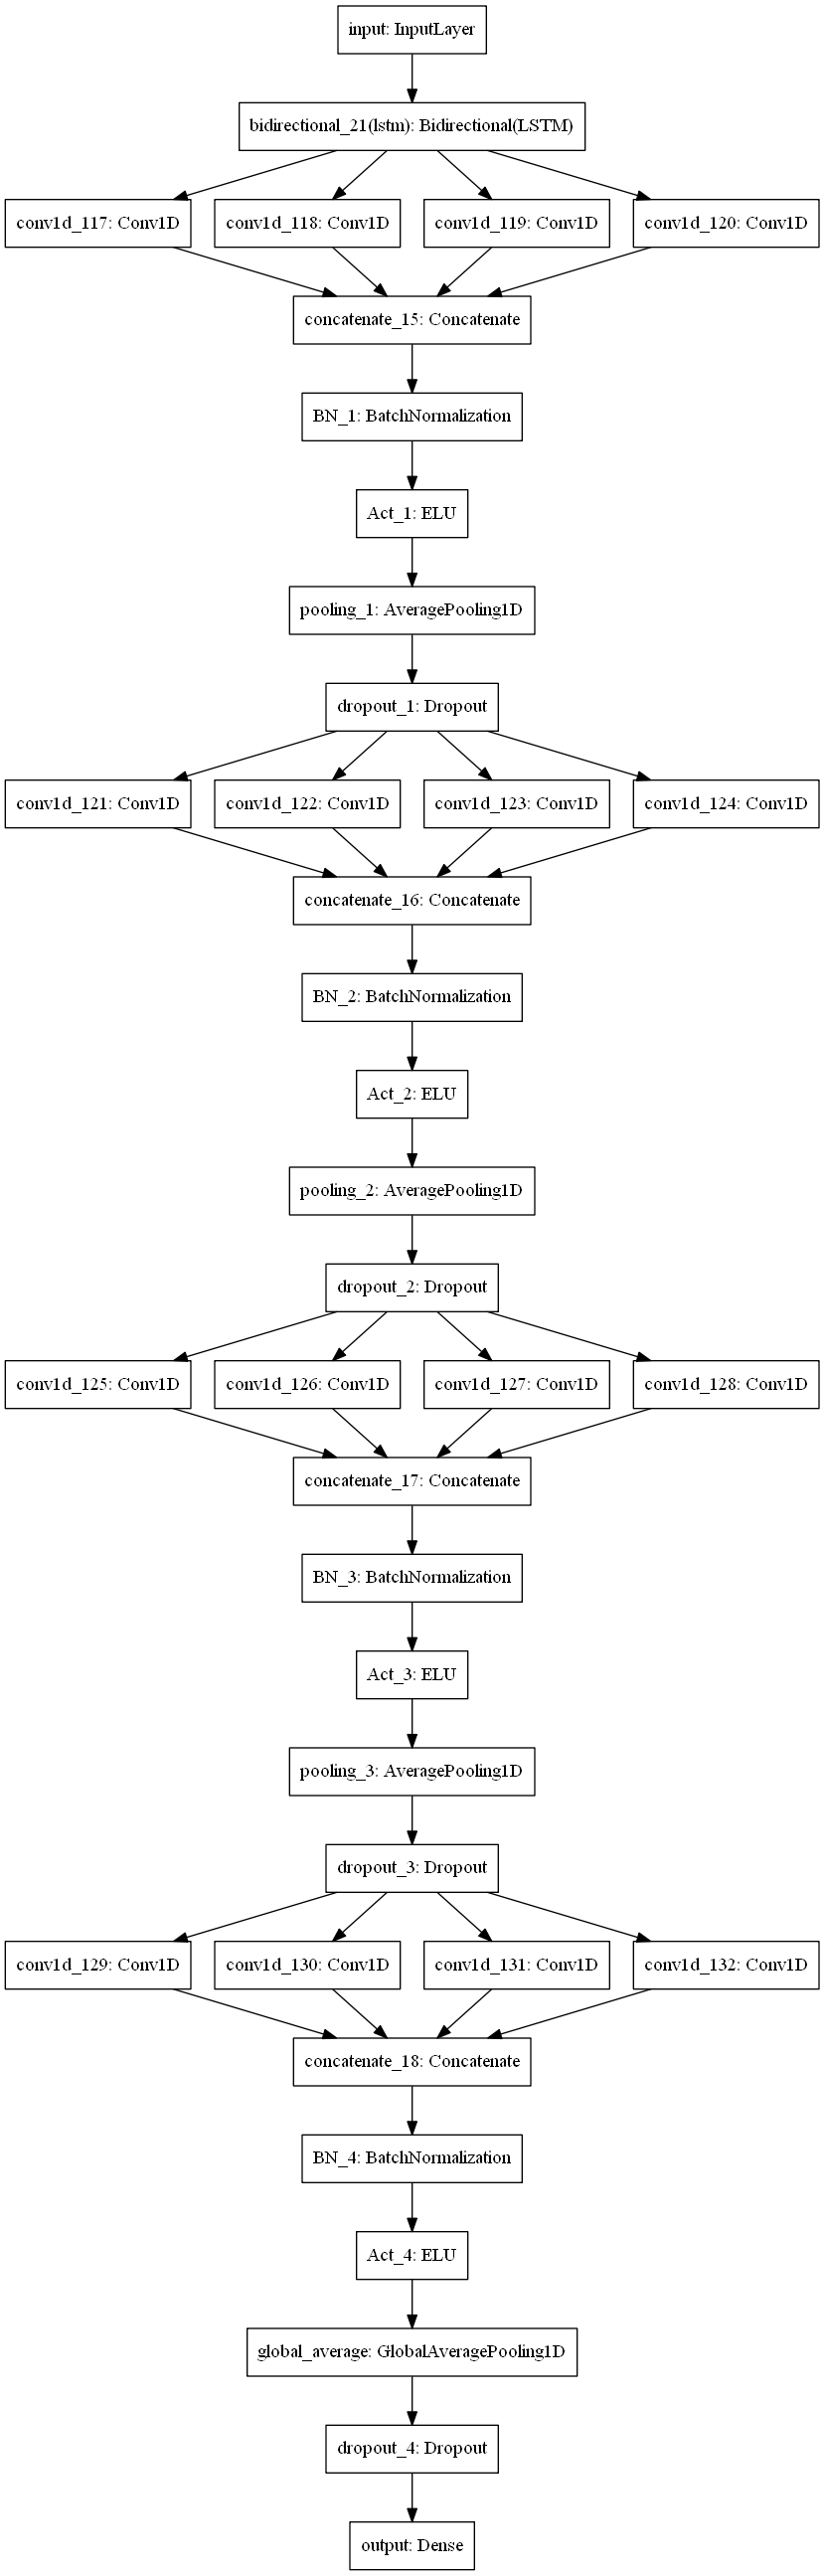

In [70]:
plot_model(model)

In [21]:
y_pred=model.predict(X2[ind][:,:,[0,1,4,5]])

In [22]:
ind = (Y2==1)|(Y2==6)

In [23]:
(y_pred>0.5)

array([[ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [Fal

In [24]:
oc = OneHotEncoder()
y=oc.fit_transform(Y2[ind,np.newaxis]).toarray()

In [25]:
ind_1=((y==1)[:,0]==(y_pred>0.5)[:,0])

In [14]:
np.clip(X,0,None).min()

0.0

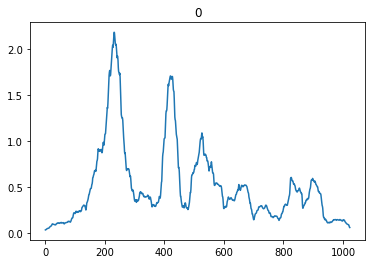

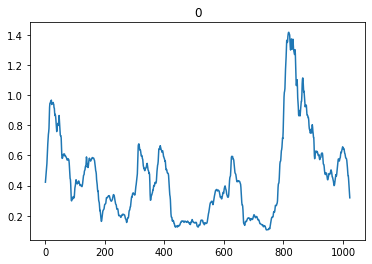

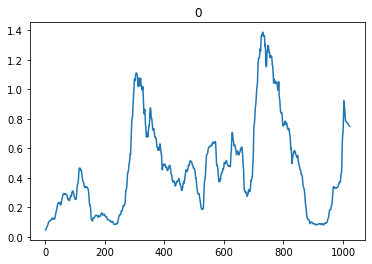

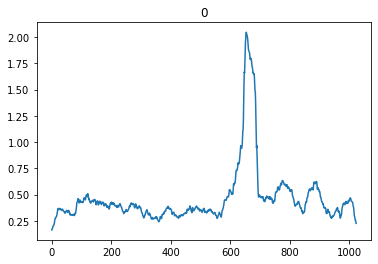

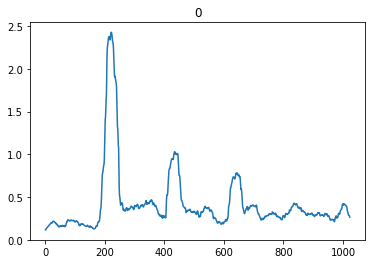

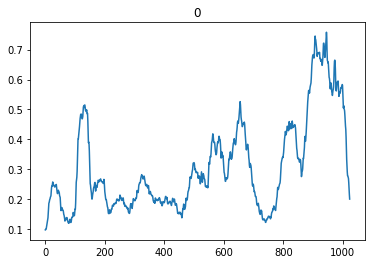

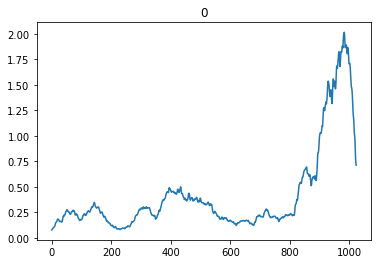

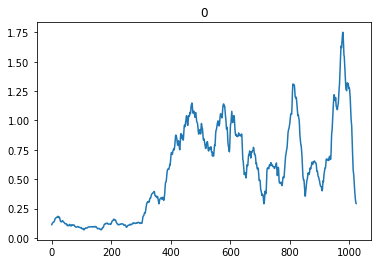

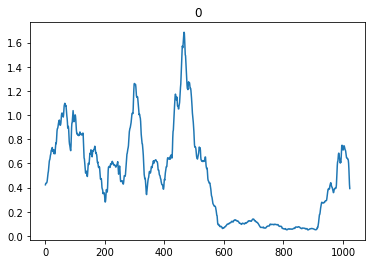

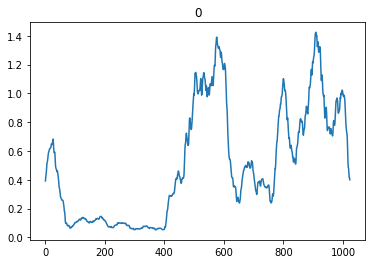

In [85]:
ind = (Y==0)#|(Y==6)
n=30
for i in range(10):
    plt.figure()
    plt.plot(Xr[ind][i+n,:,2])
    plt.title(Y[ind][i+n])
    #plt.ylim((0,10))
    #plt.xlim((0,256))

In [27]:
ind_1

array([ True, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,

In [376]:
X2[ind].shape

(61, 1024, 8)

In [377]:
np.unique(Y, return_counts=True)

[17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95]

In [19]:
np.concatenate([np.random.normal(0,1,(1,4,4)),np.random.normal(0,1,(3,4,4))],axis=0)

array([[[-1.06624383, -1.05812568, -1.16725365, -0.84641491],
        [ 0.40493544, -0.81332389,  0.27005403,  0.31195297],
        [ 0.54926607,  0.44188948,  0.74772888, -0.62261111],
        [-0.7534621 ,  0.16685887, -0.44948321,  0.16032659]],

       [[-0.08756393, -0.49149627, -0.53926001,  0.82512863],
        [ 1.53584683,  0.42664664,  0.99125308, -0.86256006],
        [-0.71991387, -0.04961059, -0.44989759, -1.15495592],
        [-0.0228956 , -0.60102967, -0.17510178,  0.91130938]],

       [[-0.41642193, -0.23081619,  0.20023527,  0.78367651],
        [ 0.3769583 , -0.43636635, -0.85018544, -0.33612614],
        [-0.60963208, -1.06310527,  0.78610146,  0.35033998],
        [-1.62685547, -0.79168937, -1.18032962, -0.49038852]],

       [[ 0.87479299, -1.6036822 , -0.02453092, -2.39659092],
        [ 0.59018145,  0.40781344,  0.0544411 ,  1.22812284],
        [-0.53897608,  0.15212614, -0.37196624,  0.32951131],
        [ 0.46709185, -0.93124903,  1.59960252,  0.78561664]]])

In [36]:
s = 'absdedd'
'b' not in s

False

In [38]:
a = str('abds')

In [42]:
a+='s'

In [113]:
np.where(X<0)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [15]:
X[4,:,4]

array([-0.00093837,  0.00049299,  0.00191846, ...,  0.01930284,
        0.01930912,  0.01931409])